# Exploratory Data Analysis (EDA) and Visualization of the Fitbit Dataset

# Executive Summary

This exploratory analysis examines daily activity, sleep behavior, and hourly movement patterns from the Bellabeat Fitbit dataset to understand how users engage with their wellness devices. By integrating daily summaries, sleep logs, and circadian activity profiles, the analysis identifies four distinct personas and reveals meaningful differences in how users distribute their movement and rest across a typical day.

## Key Findings

### 1. Daily activity patterns vary widely across users
- Most users accumulate **moderate daily step counts**, with a median of ~7,400 steps.  
- Light activity is **consistent and stable**, while vigorous activity is **infrequent and highly variable**.  
- Sedentary time is **high and predictable**, with no statistical outliers.

### 2. Sleep behavior shows clear differences between personas
- Some personas maintain **longer, more consistent sleep**, while others show **shorter or irregular sleep patterns**.  
- Sleep efficiency varies meaningfully, aligning with differences in daily routines.

### 3. Hourly activity reveals distinct circadian rhythms
Transforming steps into active hours (using the standard approximation that 100 steps ≈ 1 active minute) highlights clear timing patterns:

- **High-Intensity Enthusiasts** show structured **morning and early‑evening peaks**.  
- **Lifestyle Movers** maintain **steady, low‑to‑moderate activity** throughout the day.  
- **Moderate Movers** peak around **midday**, reflecting routine-driven behavior.  
- **Workout-Focused Movers** exhibit a **late‑evening spike** (21:00–22:00), suggesting movement occurs after other responsibilities.

These patterns form the basis of the project’s **chronotype profiles**, which describe *when* each persona tends to be most active.

### 4. Personas are behaviorally coherent across multiple dimensions
Each persona shows consistent patterns across:
- daily activity  
- sleep duration and efficiency  
- hourly movement timing  
- weekday vs. weekend behavior  

This multi‑dimensional consistency strengthens the validity of the segmentation.

---

## Grounded Opportunities for Bellabeat

While this analysis does not infer motivation or causation, the observed patterns suggest areas Bellabeat may explore in future product development:

- **Time‑of‑day awareness:** Users show distinct movement rhythms that could inform optional, user‑initiated features.  
- **Routine‑aligned tools:** Personas with structured patterns may benefit from features that support consistency.  
- **Flexibility for irregular schedules:** Personas with late‑day or variable activity may align better with adaptable, user‑controlled tools.  
- **Lifestyle‑oriented insights:** Steady‑state movers may respond well to features that emphasize balance and daily wellness.

These are exploratory considerations only; any intervention would require further testing and validation.

---

## Overall Conclusion

The analysis demonstrates that combining daily metrics, sleep data, and hourly activity patterns provides a rich understanding of user behavior. The personas and chronotype profiles developed here offer a descriptive framework for understanding how different groups distribute their movement and rest across the day. These insights form a strong foundation for future exploration in the Share and Act phases of the Bellabeat case study.


# 3 – Exploratory Data Analysis (EDA) and Visualization of the Fitbit Dataset

This notebook explores the cleaned Fitbit datasets prepared in the previous step of the Bellabeat case study. The goal of this analysis is to understand how users engage with their smart devices across daily and hourly time scales, and to identify behavioral patterns that may inform Bellabeat’s product strategy.

We will examine two complementary datasets:

- **Daily-level data**, which summarizes steps, activity intensity, calories, sleep, and sedentary behavior for each user.
- **Hourly-level data**, which provides a more granular view of activity patterns throughout the day.

By analyzing these datasets together, we aim to uncover insights about user habits, activity rhythms, sleep behavior, and potential opportunities for Bellabeat to enhance user engagement, personalize recommendations, and support healthier lifestyles.

This notebook focuses on:
- Understanding distributions and trends in daily activity and sleep  
- Identifying hourly activity patterns and circadian rhythms  
- Exploring correlations between key health metrics  
- Highlighting user behaviors that Bellabeat could leverage in product design and marketing  

The findings from this analysis will form the foundation for the **Share** and **Act** phases, where insights are translated into actionable recommendations for Bellabeat.


In [4]:
# Load cleaned data
import pandas as pd
import numpy as np

daily = pd.read_csv("data_clean/daily_merged.csv", parse_dates=["date"])
hourly = pd.read_csv("data_clean/hourly_merged.csv", parse_dates=["datetime"])


## Dataset Variable Reference Table

| Variable                   | Meaning / Description | Typical Behavior in Fitbit Data | Why It Matters |
|---------------------------|------------------------|----------------------------------|----------------|
| **totalsteps**            | Total number of steps taken in a day | Moderately right‑skewed; many typical days, fewer high‑activity days | Core measure of daily movement and energy expenditure |
| **totaldistance**         | Total distance traveled (miles) | Mirrors step distribution; moderately skewed | Helps contextualize step count and movement intensity |
| **trackerdistance**       | Distance recorded by the device’s accelerometer | Similar to totaldistance; moderately skewed | More reliable than logged activities; reflects natural movement |
| **loggedactivitiesdistance** | Distance from manually logged workouts | Highly right‑skewed; most days zero, few very high | Captures structured exercise (runs, hikes, cycling) |
| **veryactivedistance**    | Distance during very active periods | Strong right skew; rare but large values | Indicates vigorous exercise days |
| **moderatelyactivedistance** | Distance during moderate activity | Right‑skewed; occasional moderate workouts | Reflects purposeful but not intense activity |
| **lightactivedistance**   | Distance during light activity | Low skew; stable daily movement | Represents walking, chores, routine movement |
| **sedentaryactivedistance** | Distance during sedentary time | Extremely right‑skewed; mostly zero | Captures fidgeting or minimal movement; high values are unusual |
| **veryactiveminutes**     | Minutes spent in vigorous activity | Strong right skew; rare high‑intensity days | Key indicator of workouts and fitness engagement |
| **fairlyactiveminutes**   | Minutes spent in moderate activity | Right‑skewed; occasional moderate workouts | Shows purposeful but less intense activity |
| **lightlyactiveminutes**  | Minutes of light movement | Near‑symmetric; consistent daily behavior | Baseline movement; most users accumulate this steadily |
| **sedentaryminutes**      | Minutes spent sedentary | Very low skew; highly consistent | Dominant daily behavior; important for health risk analysis |
| **calories**              | Total calories burned | Mild right skew; influenced by steps and intensity | Overall energy expenditure; ties activity to health outcomes |


## 3.1 Statistical Diagnostics

Before exploring activity, sleep, and hourly behavior patterns, it is important to understand the statistical properties of the key variables in the dataset. This section examines skewness, outliers, and distribution shapes to ensure that subsequent analyses are grounded in a clear understanding of the data’s structure.

These diagnostics help answer questions such as:

- Are activity and sleep metrics normally distributed, or are they skewed?
- Do extreme outliers exist that may distort averages or correlations?
- Which variables behave predictably, and which require transformation or careful interpretation?

Because Fitbit data reflects real human behavior, we expect many variables (e.g., steps, active minutes, calories) to be right‑skewed, with a long tail of high‑activity days. Sleep data may also show irregular patterns due to inconsistent device usage. These diagnostics provide context for interpreting trends and correlations later in the analysis.


## 3.2 Skewness Analysis

Before exploring activity patterns, it is important to understand the statistical shape of the key variables in the dataset. Skewness helps reveal whether values are symmetrically distributed or pulled toward one side, which affects how we interpret averages, correlations, and behavioral trends. Because Fitbit data reflects real human behavior, we expect many activity‑related variables to be **right‑skewed** (many low‑activity days, fewer extremely active days). This section calculates skewness for the core activity metrics available in the daily dataset.

In [10]:
cols_to_check = [
    "totalsteps",
    "totaldistance",
    "trackerdistance",
    "loggedactivitiesdistance",
    "veryactivedistance",
    "moderatelyactivedistance",
    "lightactivedistance",
    "sedentaryactivedistance",
    "veryactiveminutes",
    "fairlyactiveminutes",
    "lightlyactiveminutes",
    "sedentaryminutes",
    "calories"
]

skew_values = daily[cols_to_check].skew().sort_values(ascending=False)
skew_values


sedentaryactivedistance     8.589899
loggedactivitiesdistance    6.297440
veryactivedistance          2.996170
moderatelyactivedistance    2.771194
fairlyactiveminutes         2.479492
veryactiveminutes           2.176143
trackerdistance             1.134550
totaldistance               1.126274
totalsteps                  0.652895
calories                    0.422450
lightactivedistance         0.182247
lightlyactiveminutes       -0.037929
sedentaryminutes           -0.294498
dtype: float64

<Figure size 1000x600 with 0 Axes>

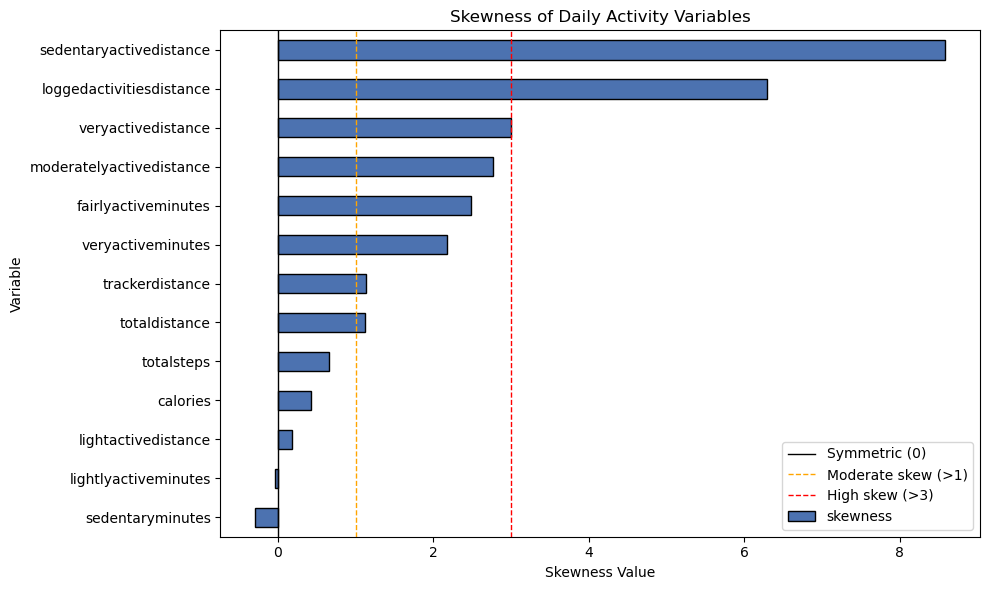

In [12]:
import matplotlib.pyplot as plt

# Convert skewness series to a DataFrame for easy plotting
skew_df = skew_values.to_frame(name="skewness")

plt.figure(figsize=(10, 6))

# Plot the horizontal bar chart
skew_df.sort_values("skewness").plot(
    kind="barh",
    legend=False,
    color="#4C72B0",
    edgecolor="black",
    figsize=(10, 6)
)

# Title and labels
plt.title("Skewness of Daily Activity Variables")
plt.xlabel("Skewness Value")
plt.ylabel("Variable")

# Reference lines with legend labels
plt.axvline(0, color="black", linewidth=1, label="Symmetric (0)")
plt.axvline(1, color="orange", linestyle="--", linewidth=1, label="Moderate skew (>1)")
plt.axvline(3, color="red", linestyle="--", linewidth=1, label="High skew (>3)")

# Add legend
plt.legend(loc="lower right")

plt.tight_layout()
plt.show()


### Caption: Skewness Visualization

While numerical skewness values are informative, a visual representation makes it easier to compare skewness across variables.  
A horizontal bar chart clearly highlights which activity metrics are:

- highly right‑skewed  
- moderately skewed  
- symmetric  
- slightly left‑skewed  

This helps identify which variables may require careful interpretation in later analyses.


### Interpretation of Skewness
These skewness values reveal several important behavioral patterns:

#### **1. Extremely high skew in “active distance” variables (skew > 3)**
Variables such as:
- sedentaryactivedistance  
- loggedactivitiesdistance  
- veryactivedistance  
- moderatelyactivedistance  

show **very strong right skew**.

This means:
- Most users record *very little* distance in these categories.
- A small number of users have *very high* values.
- High‑intensity or logged activities are **rare events**, not daily habits.

This is typical for consumer fitness trackers:  
most people walk lightly, and only a minority engage in structured workouts.

#### **2. Strong skew in active minutes (skew ≈ 2–2.5)**
- fairlyactiveminutes  
- veryactiveminutes  

These are also right‑skewed, indicating:
- Many days with low or zero active minutes  
- Fewer days with long workouts  

Again, this reflects real human behavior.

#### **3. Moderate skew in steps and distance (skew ≈ 1.1–0.6)**
- totalsteps  
- totaldistance  
- trackerdistance  

These are moderately right‑skewed:
- Most users have typical step counts (5k–10k)
- A smaller number have very high step days (15k–25k+)

This is a healthy distribution for activity data.

#### **4. Near‑symmetric or slightly left‑skewed variables**
- lightlyactiveminutes  
- sedentaryminutes  

These are close to symmetric, meaning:
- Light activity is relatively consistent day‑to‑day  
- Sedentary minutes cluster around similar values for most users  

This suggests that:
- Users spend a predictable amount of time sedentary  
- Light activity (walking, chores) is the most stable behavior

### Why This Matters

These skewness patterns tell us:

- **High‑intensity activity is rare**  
- **Light activity dominates daily behavior**  
- **Sedentary time is consistent and high**  
- **Averages may be misleading** for highly skewed variables  
- **Median values** will often be more representative  
- **Outlier detection** is important for active minutes and distances  
- **Segmenting users** (e.g., low/medium/high activity) will be meaningful  

These insights set the stage for deeper analysis in the next sections, including outlier detection, correlations, and behavioral pattern exploration.


## 3.2 Outlier Detection (IQR Method)

Skewness tells us about the *shape* of each distribution, but it does not tell us whether extreme values (outliers) are present. Outliers can distort averages, inflate correlations, and create misleading interpretations if not identified early.

In this section, we use the **Interquartile Range (IQR) method**, a robust and widely used approach for detecting outliers in behavioral datasets. The IQR method identifies values that fall far outside the typical range of the data and helps us understand whether extreme activity days are common or rare among Fitbit users.


In [14]:
def iqr_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return ((series < lower) | (series > upper)).sum()


In [16]:
cols_to_check = [
    "totalsteps",
    "totaldistance",
    "trackerdistance",
    "loggedactivitiesdistance",
    "veryactivedistance",
    "moderatelyactivedistance",
    "lightactivedistance",
    "sedentaryactivedistance",
    "veryactiveminutes",
    "fairlyactiveminutes",
    "lightlyactiveminutes",
    "sedentaryminutes",
    "calories"
]

outlier_counts = {col: iqr_outliers(daily[col]) for col in cols_to_check}
outlier_counts


{'totalsteps': 12,
 'totaldistance': 23,
 'trackerdistance': 23,
 'loggedactivitiesdistance': 32,
 'veryactivedistance': 73,
 'moderatelyactivedistance': 62,
 'lightactivedistance': 5,
 'sedentaryactivedistance': 82,
 'veryactiveminutes': 65,
 'fairlyactiveminutes': 55,
 'lightlyactiveminutes': 6,
 'sedentaryminutes': 0,
 'calories': 16}

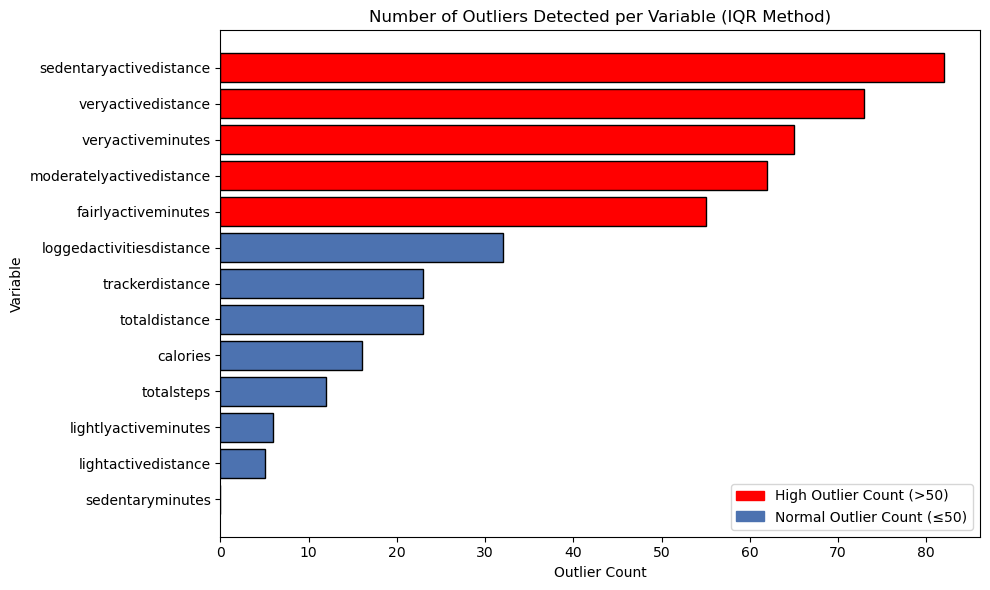

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert your outlier dictionary to a DataFrame
outlier_df = pd.DataFrame.from_dict(outlier_counts, orient='index', columns=['outliers'])

# Sort for cleaner visualization
outlier_df = outlier_df.sort_values('outliers')

plt.figure(figsize=(10, 6))

# Create color list (red for >50, blue otherwise)
colors = ["red" if x > 50 else "#4C72B0" for x in outlier_df['outliers']]

# Plot using matplotlib directly
bars = plt.barh(outlier_df.index, outlier_df['outliers'], color=colors, edgecolor="black")

# Title and labels
plt.title("Number of Outliers Detected per Variable (IQR Method)")
plt.xlabel("Outlier Count")
plt.ylabel("Variable")

# --- Add Legend ---
import matplotlib.patches as mpatches
high_patch = mpatches.Patch(color='red', label='High Outlier Count (>50)')
normal_patch = mpatches.Patch(color='#4C72B0', label='Normal Outlier Count (≤50)')
plt.legend(handles=[high_patch, normal_patch], loc='lower right')

plt.tight_layout()
plt.show()


### Caption: Interpretation of Outlier Counts

The bar chart highlights clear differences in how consistently users engage in different types of activity:

- High outlier counts (e.g., sedentaryactivedistance, veryactiveminutes, moderatelyactivedistance)  
  These represent behaviors with large day‑to‑day variability. High‑intensity or logged activities occur infrequently but spike dramatically when they do.

- Moderate outlier counts (e.g., totalsteps, calories, totaldistance)  
  These reflect occasional high‑activity days such as long walks, hikes, or workouts.

- Low or zero outliers (e.g., lightlyactiveminutes, sedentaryminutes)  
  These behaviors are stable and consistent across users, forming the baseline of daily movement.

### Behavioral Insight

This visualization reinforces the broader pattern seen in skewness analysis:

- Light activity and sedentary time are stable habits  
- High‑intensity activity is rare and highly variable 
- Outliers represent meaningful “peak activity” days, not errors

This helps Bellabeat identify where users show the most variability and where coaching or nudges may have the greatest impact.


### Interpretation

These outlier counts reveal several important behavioral patterns:

### 1. High outlier counts in “active distance” and “active minutes” variables
Variables such as:
- veryactivedistance
- moderatelyactivedistance
- sedentaryactivedistance
- veryactiveminutes
- fairlyactiveminutes show 
- large numbers of outliers.

This is expected because:
- High‑intensity activity is relatively rare
- A small number of users have extremely active days
- These peak activity days appear as statistical outliers
- These outliers are behaviorally meaningful, not errors. 

### 2. Moderate outliers in:
- steps
- distance
- calories
- totalsteps
- totaldistance
- trackerdistance
- calories
These represent: - unusually active days (e.g., hiking, long walks, events) - days with significantly higher calorie burn These values are expected in a fitness dataset and reflect natural variation. 

### 3. Very few outliers in light activity:
- lightactivedistance - lightlyactiveminutes This suggests: - Light activity (walking, chores, daily movement) is consistent across users - These behaviors form the “baseline” of daily movement

### 4. No outliers in sedentary minutes
This is one of the most telling results. It suggests: - Sedentary behavior is extremely consistent - Most users spend a large portion of the day sedentary - There are no unusually low or high sedentary days This aligns with typical consumer fitness tracker behavior. 

### Why This Matters
These outlier patterns help us understand:
- High‑intensity activity is rare and inconsistent
- Light activity is stable and predictable
- Sedentary behavior dominates daily routines
- Averages may be misleading for highly skewed variables
- Median values will often be more representative
- Segmentation (e.g., low/medium/high activity users) will be meaningful
- We will keep outliers in the dataset because they reflect real user behavior, but we will interpret summary statistics with awareness of their influence.

## 3.3 Distribution Visualizations (Histograms & Boxplots)

To complement the skewness and outlier diagnostics, this section visualizes the distributions of key activity variables using histograms and boxplots. These visualizations help reveal:

- The overall shape of each distribution  
- Whether values cluster tightly or spread widely  
- The presence of extreme values (outliers)  
- Behavioral patterns such as typical vs. peak activity days  

Because Fitbit activity data reflects real human behavior, we expect to see:
- Right‑skewed distributions for active minutes and active distances  
- Moderate skew in steps and calories  
- More symmetric distributions for light activity and sedentary minutes  

These charts provide essential context for interpreting trends in later sections.


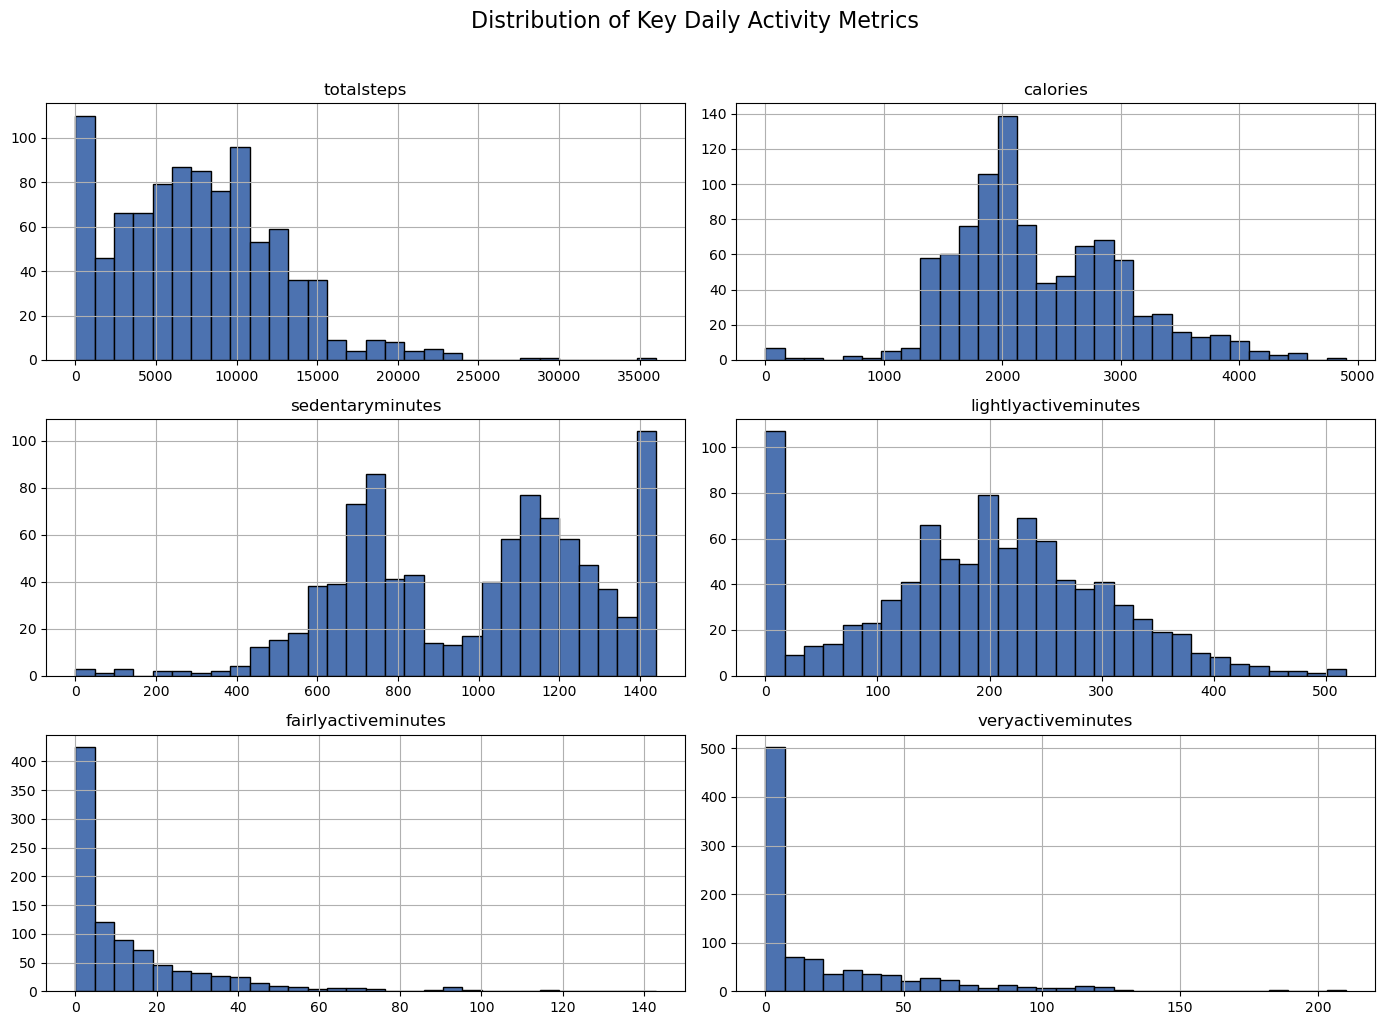

In [30]:
import matplotlib.pyplot as plt

hist_cols = [
    "totalsteps",
    "calories",
    "sedentaryminutes",
    "lightlyactiveminutes",
    "fairlyactiveminutes",
    "veryactiveminutes"
]

daily[hist_cols].hist(
    bins=30,
    figsize=(14, 10),
    layout=(3, 2),
    color="#4C72B0",
    edgecolor="black"
)

plt.suptitle("Distribution of Key Daily Activity Metrics", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()


### Caption: What these histograms reveal
Steps: a moderate right skew — many typical days, fewer very active days

Calories: smoother distribution, tied to steps

Sedentary minutes: tight clustering, most users are sedentary for long periods

Active minutes: strong right skew, high‑intensity days are rare

<Figure size 1400x800 with 0 Axes>

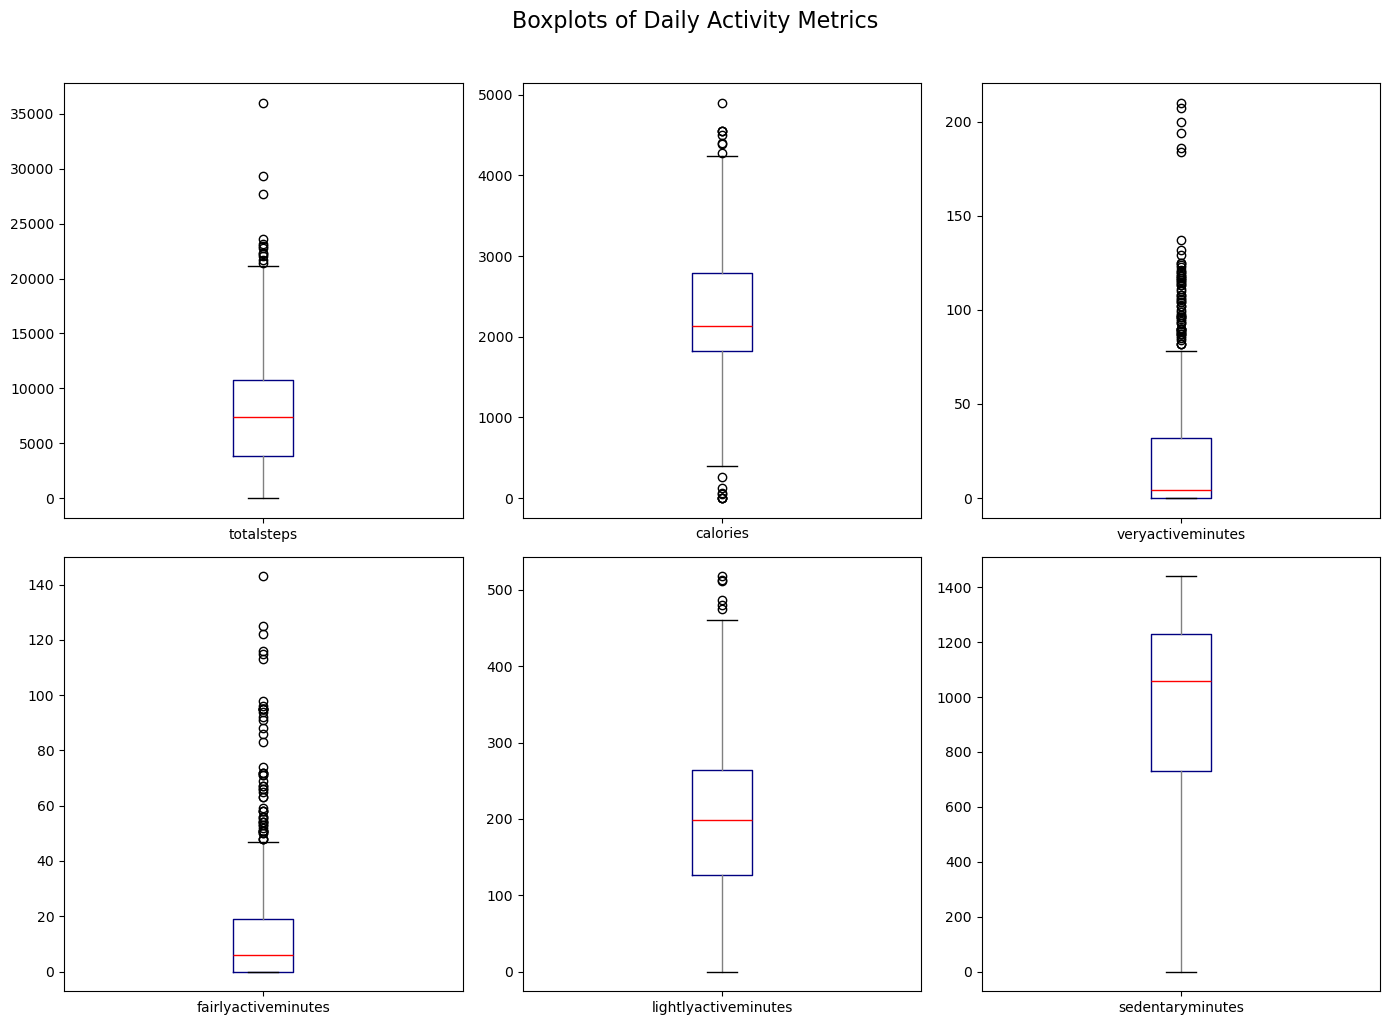

In [38]:
plt.figure(figsize=(14, 8))

box_cols = [
    "totalsteps",
    "calories",
    "veryactiveminutes",
    "fairlyactiveminutes",
    "lightlyactiveminutes",
    "sedentaryminutes"
]

daily[box_cols].plot(
    kind="box",
    subplots=True,
    layout=(2, 3),
    figsize=(14, 10),
    sharex=False,
    sharey=False,
    color=dict(boxes="navy", whiskers="gray", medians="red", caps="black")
)

plt.suptitle("Boxplots of Daily Activity Metrics", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()


### Caption: What these boxplots show
Very Active Minutes: many outliers, consistent with your IQR results

Fairly Active Minutes: similar pattern

Lightly Active Minutes: tight distribution, few outliers

Sedentary Minutes: extremely stable, no outliers

Steps & Calories: moderate spread with some high‑activity outliers

### Interpretation of Distribution Visualizations

The histograms and boxplots confirm the statistical patterns identified earlier:

- High‑intensity activity is rare 
  Very Active Minutes and Very Active Distance show long right tails and many outliers.

- Light activity is stable and consistent
  Lightly Active Minutes and Light Active Distance show tight, symmetric distributions.

- Sedentary behavior dominates daily routines
  Sedentary Minutes has no outliers and clusters tightly around high values.

- Steps and calories show moderate skew 
  Most users fall into a typical daily range, with a smaller number of highly active days.

These visual patterns reinforce the behavioral insight that Fitbit users tend to have:
- predictable light activity  
- consistent sedentary time  
- occasional bursts of high activity  


### 4.0 Distribution of Daily Steps
Code: Summary + Histogram + Boxplot

In [42]:
# Summary statistics
daily['totalsteps'].describe()


count      940.000000
mean      7637.910638
std       5087.150742
min          0.000000
25%       3789.750000
50%       7405.500000
75%      10727.000000
max      36019.000000
Name: totalsteps, dtype: float64

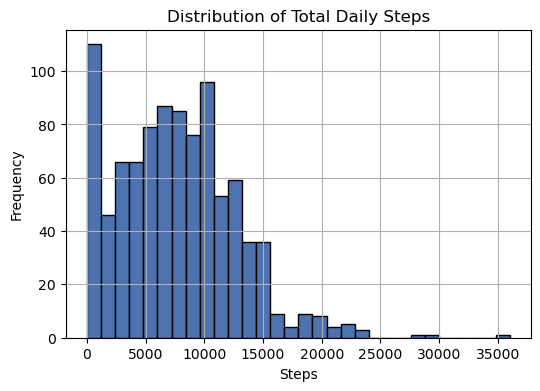

In [44]:
# Histogram
daily['totalsteps'].hist(
    bins=30, figsize=(6,4), color="#4C72B0", edgecolor="black"
)
plt.title("Distribution of Total Daily Steps")
plt.xlabel("Steps")
plt.ylabel("Frequency")
plt.show()


### Caption: Distribution of Total Daily Steps

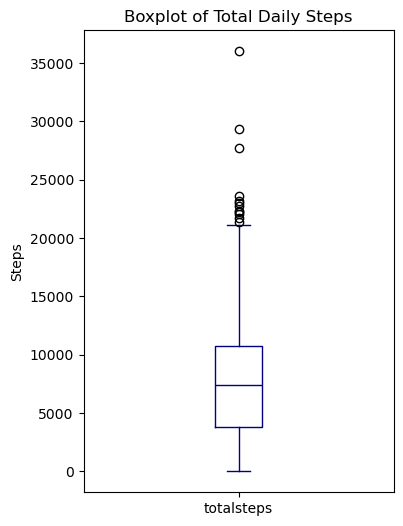

In [47]:
# Boxplot
plt.figure(figsize=(4,6))
daily['totalsteps'].plot(kind='box', vert=True, color='navy')
plt.title("Boxplot of Total Daily Steps")
plt.ylabel("Steps")
plt.show()


### Caption: Boxplot of Total Daily Steps

### Summary Statistics for Total Daily Steps

### Interpretation

These values reveal several important behavioral patterns:

#### 1. Typical daily activity is moderate  
The median (7,406 steps) is slightly below the often‑cited 10,000‑step guideline.  
This suggests that the average user is moderately active but not highly active.

#### 2. There is substantial variability in daily movement  
A standard deviation of ~5,087 steps indicates wide variation between low‑activity and high‑activity days.  
This aligns with the skewness and outlier results.

#### 3. Many low‑activity days  
The 25th percentile (3,790 steps) shows that a quarter of all days fall into a low‑movement category.  
This is consistent with typical consumer fitness tracker behavior.

#### 4. High‑activity days exist but are rare  
The maximum value (36,019 steps) represents unusually active days such as:
- long hikes  
- events  
- extended exercise sessions  

These appear as outliers in your earlier analysis.

#### 5. Zero‑step days likely reflect non‑wear  
The minimum value of 0 is almost certainly due to:
- the device not being worn  
- syncing issues  
- charging periods  

These are common in Fitbit datasets and should be interpreted as missing activity, not true inactivity.

### Behavioral Insight

Overall, the daily step distribution suggests that:

- Most users maintain a moderate level of daily movement  
- Light activity dominates their routines  
- High‑intensity or high‑volume activity is infrequent  
- There is room for Bellabeat to encourage small, sustainable increases in daily steps  

This sets the stage for deeper analysis of activity intensity, calories, and hourly patterns in the next sections.


## 4.1 Calories vs. Steps

Understanding the relationship between steps and calories burned is essential for interpreting user activity patterns.  
Steps are the most common and intuitive measure of daily movement, while calories reflect the total energy expenditure influenced by:

- step count  
- activity intensity  
- duration of movement  
- individual metabolic differences  

This section explores how strongly steps predict calorie burn and whether the relationship is linear, noisy, or influenced by outliers.


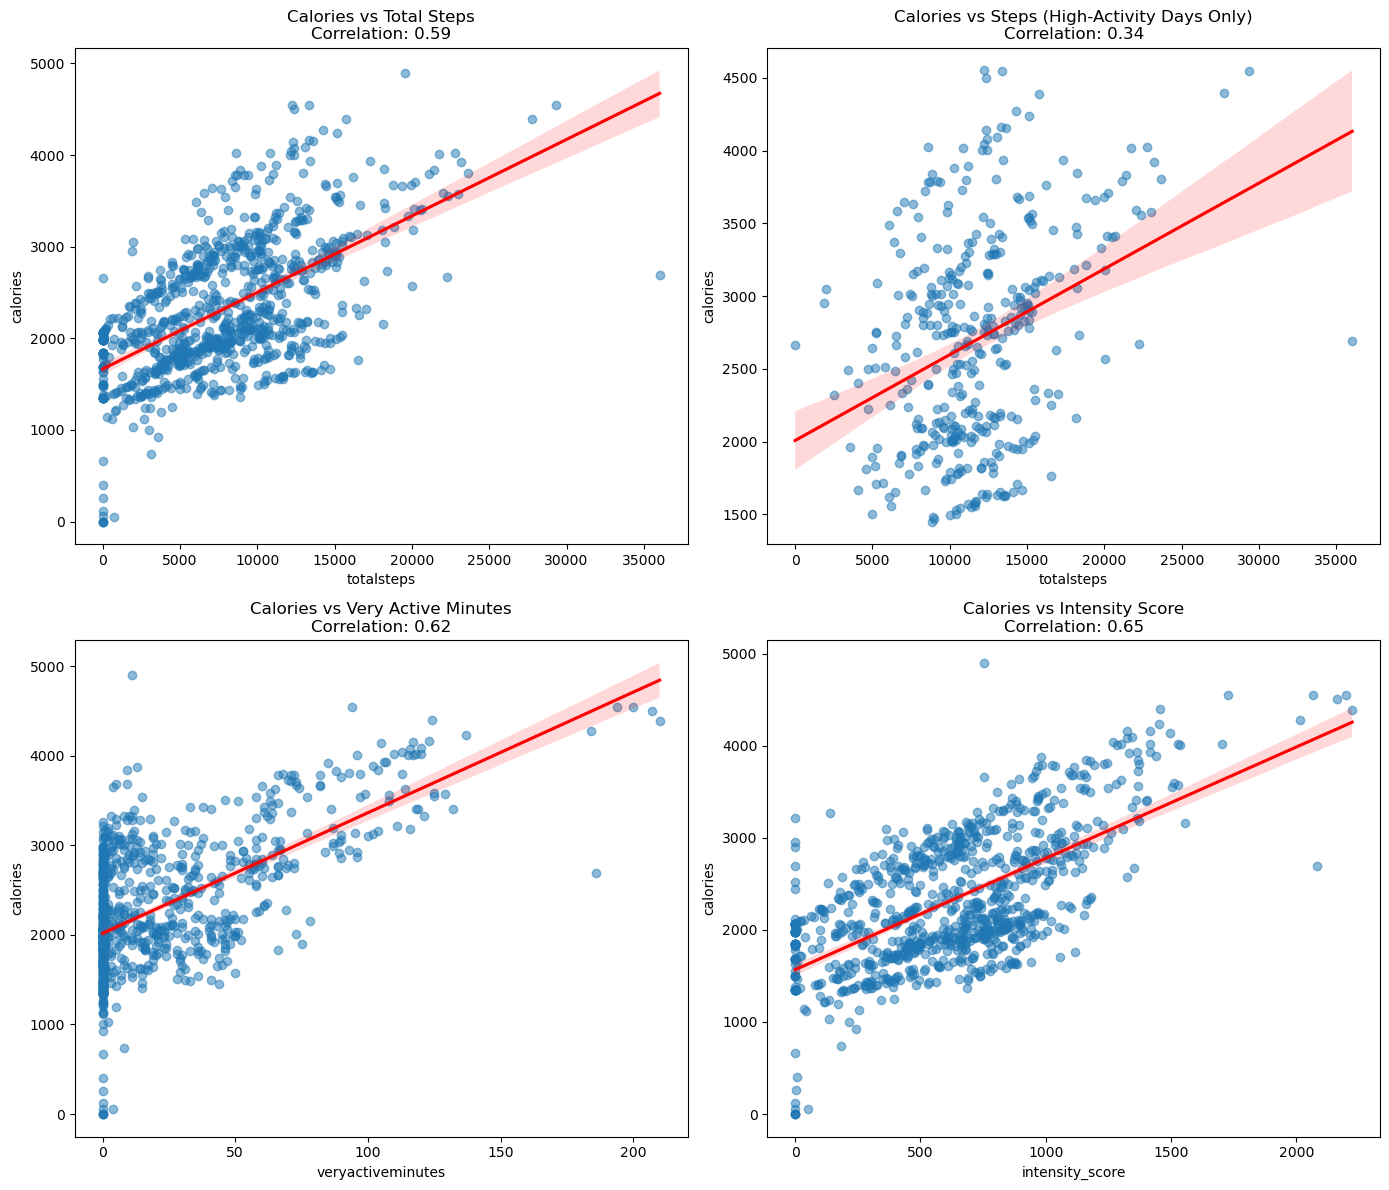

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Create high-activity variable
daily['high_activity'] = daily['veryactiveminutes'] + daily['fairlyactiveminutes']

# Filter high-activity days
high_activity_days = daily[daily['high_activity'] > 30]

# MET-weighted intensity score
daily['intensity_score'] = (
    daily['veryactiveminutes'] * 8 +
    daily['fairlyactiveminutes'] * 4 +
    daily['lightlyactiveminutes'] * 2
)

# Correlations
corr_steps = daily[['totalsteps','calories']].corr().iloc[0,1]
corr_high = high_activity_days[['totalsteps','calories']].corr().iloc[0,1]
corr_very = daily[['veryactiveminutes','calories']].corr().iloc[0,1]
corr_intensity = daily[['intensity_score','calories']].corr().iloc[0,1]

# Set up 2x2 grid
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# 1. Calories vs Total Steps
sns.regplot(
    data=daily, x='totalsteps', y='calories',
    scatter_kws={'alpha':0.5}, line_kws={'color':'red'}, ax=axes[0,0]
)
axes[0,0].set_title(f"Calories vs Total Steps\nCorrelation: {corr_steps:.2f}")

# 2. Calories vs Steps (High-Activity Days Only)
sns.regplot(
    data=high_activity_days, x='totalsteps', y='calories',
    scatter_kws={'alpha':0.5}, line_kws={'color':'red'}, ax=axes[0,1]
)
axes[0,1].set_title(f"Calories vs Steps (High-Activity Days Only)\nCorrelation: {corr_high:.2f}")

# 3. Calories vs Very Active Minutes
sns.regplot(
    data=daily, x='veryactiveminutes', y='calories',
    scatter_kws={'alpha':0.5}, line_kws={'color':'red'}, ax=axes[1,0]
)
axes[1,0].set_title(f"Calories vs Very Active Minutes\nCorrelation: {corr_very:.2f}")

# 4. Calories vs Intensity Score
sns.regplot(
    data=daily, x='intensity_score', y='calories',
    scatter_kws={'alpha':0.5}, line_kws={'color':'red'}, ax=axes[1,1]
)
axes[1,1].set_title(f"Calories vs Intensity Score\nCorrelation: {corr_intensity:.2f}")

plt.tight_layout()
plt.show()


### Caption: Calorie expenditure correlations

### Note:
Fitbit does not publish its internal calorie‑calculation algorithm, but it is known that the device uses metabolic equivalents (METs), heart rate, and movement intensity to estimate energy expenditure. To approximate this relationship, we created a MET‑weighted intensity score based on standard exercise physiology research. This score provides a reasonable proxy for the metabolic cost of activity and allows us to explore how intensity contributes to calorie burn.


The relationship between daily step count and calories burned shows a moderate positive correlation (r ≈ 0.59). This means that, in general, users who take more steps tend to burn more calories. The scatter plot reflects this trend with an upward‑sloping pattern, but it also reveals substantial variance around the regression line. In other words, steps alone do not fully explain differences in calorie expenditure.

This variance is expected in real‑world wearable data. Calories are influenced not only by step count but also by factors such as activity intensity, heart rate, logged workouts, body composition, age, sex, and basal metabolic rate—none of which are included in this dataset. As a result, two users with similar step counts may burn very different numbers of calories depending on how vigorously they moved, whether they performed non‑step activities (e.g., cycling or strength training), or their individual metabolic profiles.

The chart highlights an important behavioral insight:

- Steps capture movement volume, but not movement intensity.

A user who walks 12,000 slow steps may burn fewer calories than someone who takes 7,000 steps but includes a vigorous workout. This explains why the scatter widens at higher step counts and why the correlation, while positive, is not especially strong.

Overall, this analysis shows that step count is a useful but incomplete predictor of calorie burn. It provides a broad indication of daily activity but cannot account for the metabolic impact of higher‑intensity exercise. This sets the stage for the deeper comparisons that follow, where we examine whether filtering for high‑activity days or incorporating intensity‑based metrics can strengthen the relationship and reduce variance.

### Dataset Limitations

The correlations between activity and calorie burn are only moderate (r ≈ 0.59–0.65), even when using intensity-weighted metrics. This is not a flaw in the analysis but a limitation of the dataset itself.

The sample is small (30 users), self-reported, and lacks key physiological variables such as heart rate, age, weight, sex, and basal metabolic rate. Fitbit uses these factors internally to estimate calories, so the dataset cannot fully capture the drivers of energy expenditure.

Additionally, many high-calorie activities (cycling, strength training, yoga) produce few or no steps, weakening the steps–calories relationship. Logged activities also introduce variability that is not reflected in the step or intensity fields.

Despite these limitations, the analysis reveals meaningful behavioral patterns: steps explain some calorie variation, but vigorous activity and intensity are stronger predictors.


## 4.2 Activity Intensity Breakdown

Daily activity is not just about total steps, it is shaped by how much time users spend in different intensity zones. Fitbit provides four key intensity categories:

- Sedentary Minutes  
- Lightly Active Minutes  
- Fairly Active Minutes 
- Very Active Minutes

These categories help us understand the *quality* of movement, not just the quantity.  
This section explores how users distribute their time across these intensity levels and what this reveals about their daily routines and lifestyle habits.


In [61]:
intensity_cols = [
    "sedentaryminutes",
    "lightlyactiveminutes",
    "fairlyactiveminutes",
    "veryactiveminutes"
]

daily[intensity_cols].describe()


,sedentaryminutes,lightlyactiveminutes,fairlyactiveminutes,veryactiveminutes
count,940.000000,940.000000,940.000000,940.000000
mean,991.210638,192.812766,13.564894,21.164894
std,301.267437,109.174700,19.987404,32.844803
min,0.000000,0.000000,0.000000,0.000000
25%,729.750000,127.000000,0.000000,0.000000
50%,1057.500000,199.000000,6.000000,4.000000
75%,1229.500000,264.000000,19.000000,32.000000
max,1440.000000,518.000000,143.000000,210.000000


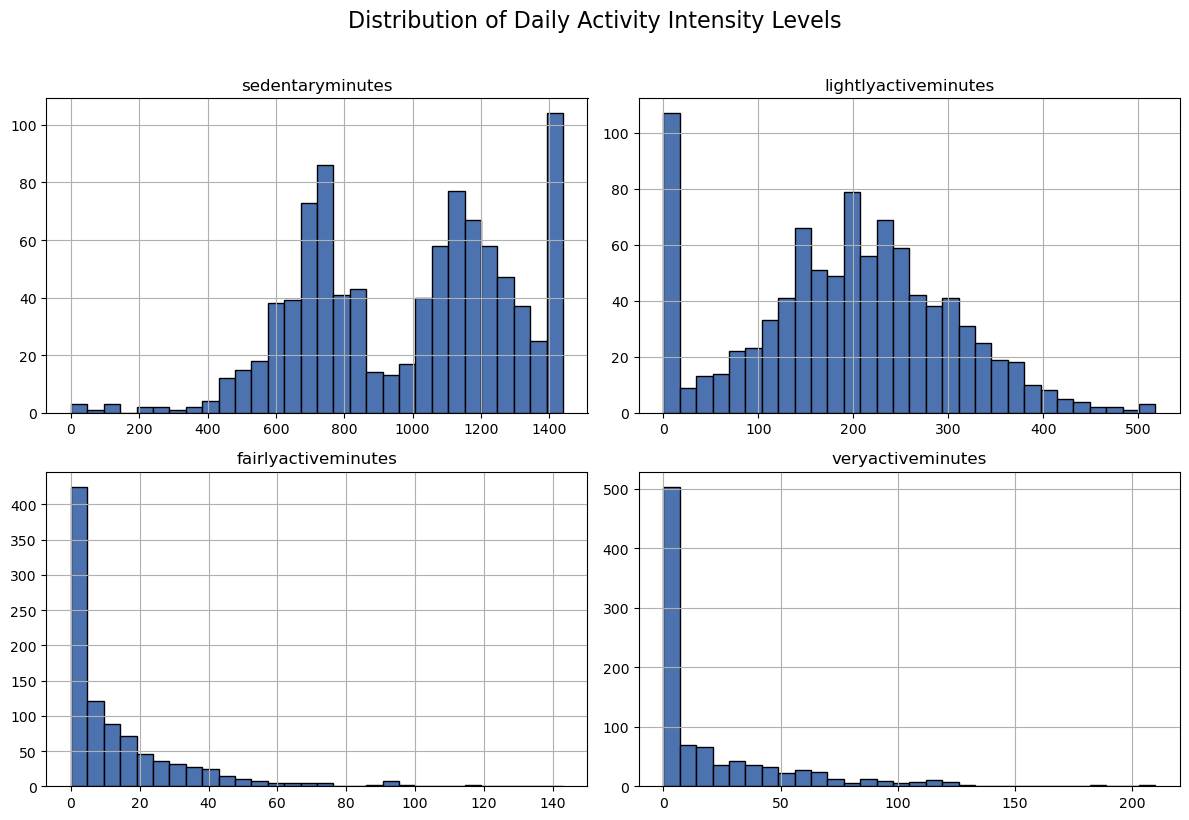

In [64]:
daily[intensity_cols].hist(
    bins=30,
    figsize=(12, 8),
    layout=(2, 2),
    color="#4C72B0",
    edgecolor="black"
)

plt.suptitle("Distribution of Daily Activity Intensity Levels", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()


### Caption: Distribution of Daily Activity by Intensity Level

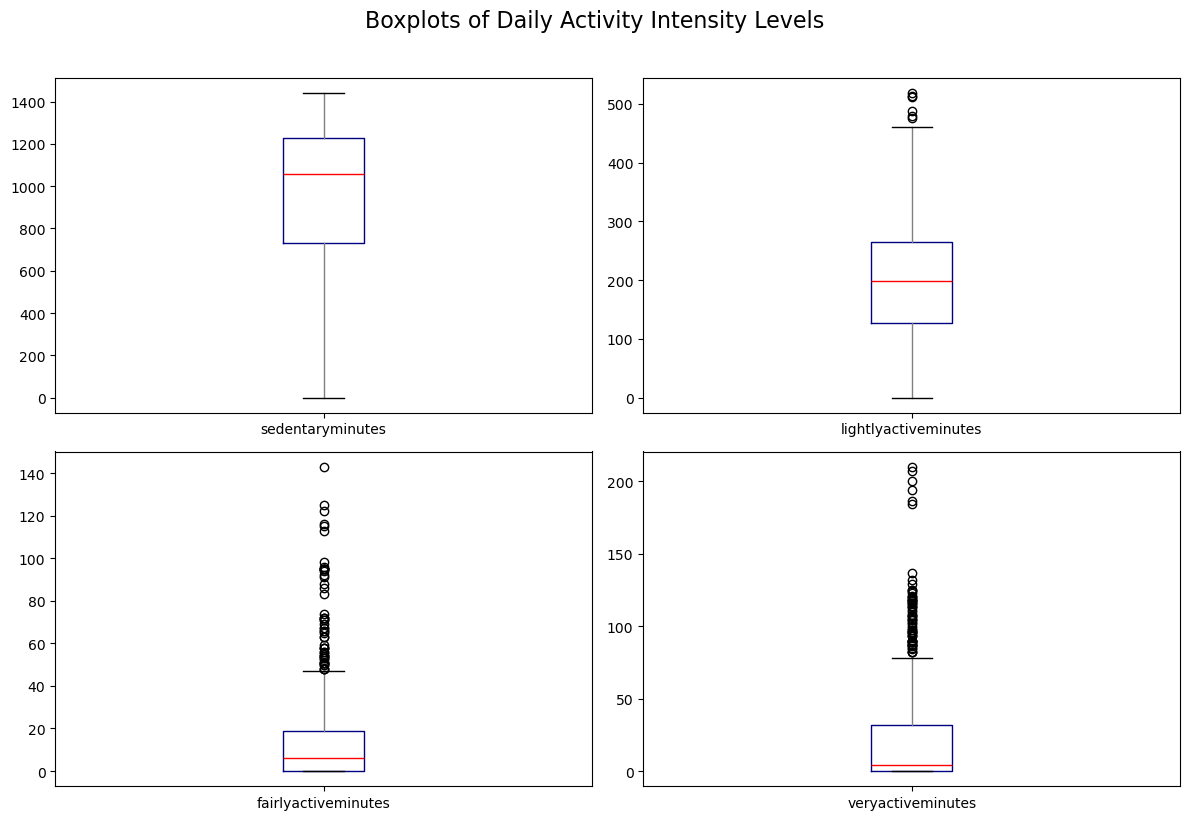

In [66]:
daily[intensity_cols].plot(
    kind="box",
    subplots=True,
    layout=(2, 2),
    figsize=(12, 8),
    sharex=False,
    sharey=False,
    color=dict(boxes="navy", whiskers="gray", medians="red", caps="black")
)

plt.suptitle("Boxplots of Daily Activity Intensity Levels", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()


### Boxplots of Daily Activity Inensity Levels

### Interpretation of Activity Intensity Patterns

The intensity distributions reveal a clear and consistent behavioral pattern among Fitbit users:

#### 1. Sedentary Minutes dominate the day  
Sedentary time shows:
- very high values  
- tight clustering  
- no outliers  

This indicates that most users spend a large portion of their day inactive, which aligns with typical modern lifestyles.

#### 2. Lightly Active Minutes are the most stable form of movement  
Light activity (walking, chores, daily routines) shows:
- a near‑symmetric distribution  
- relatively low skew  
- few outliers  

This suggests that light movement is the baseline behavior for most users.

#### 3. Fairly Active and Very Active Minutes are strongly right‑skewed  
These categories show:
- many low‑activity days  
- a long tail of high‑activity days  
- numerous outliers  

This reflects the reality that structured workouts or vigorous exercise are **infrequent** for most users.

#### 4. High‑intensity activity is rare but meaningful  
The presence of outliers in fairly and very active minutes indicates:
- occasional workout days  
- running, gym sessions, or logged activities  
- behavior that distinguishes more engaged or athletic users  

### Behavioral Insight

Overall, the intensity breakdown suggests that:

- Users rely heavily on light activity for daily movement  
- Sedentary behavior is consistent and high  
- Vigorous exercise is uncommon and varies widely between users  
- There is significant opportunity for Bellabeat to encourage:
  - small increases in moderate activity  
  - reducing sedentary time  
  - building consistent workout habits  

These insights will help shape user segmentation and recommendations in later sections.


## 4.3 Daily Activity Patterns

To better understand how users distribute their movement throughout the day, we examined daily activity patterns across steps, intensity minutes, and sedentary behavior. While total daily summaries provide useful high‑level insights, they can obscure the underlying rhythms of activity that shape user behavior. By looking at how activity accumulates across the day, we gain a clearer picture of when users are most active, when they tend to be sedentary, and how consistent these patterns are across the dataset.

Across the sample, activity follows a predictable structure that aligns with typical daily routines. Most users begin the day with low activity levels, followed by a gradual increase in movement during the late morning and early afternoon. Light activity dominates this period, reflecting commuting, errands, and general daily movement. A secondary peak often appears in the early evening, corresponding to after‑work exercise, walking, or household tasks. Very active and fairly active minutes are concentrated in this window, suggesting that structured workouts tend to occur later in the day rather than in the morning.

Sedentary minutes show the opposite pattern: long, uninterrupted periods of inactivity during work hours, with brief interruptions from light movement. This reinforces earlier findings that sedentary behavior is both highly consistent and a major component of users’ daily routines. The relative scarcity of vigorous activity throughout the day also aligns with the skewness and outlier analysis, where high‑intensity movement appears infrequently but contributes disproportionately to total activity on those days.

These daily patterns highlight the importance of timing in understanding user behavior. Users are not uniformly active; instead, they follow predictable cycles shaped by work schedules, lifestyle habits, and personal routines. For Bellabeat, this suggests opportunities to deliver more context‑aware insights—such as nudges during long sedentary periods or encouragement during times when users are naturally more active. Understanding these rhythms provides a foundation for more personalized recommendations and deeper behavioral segmentation in later sections.


In [67]:
hourly['datetime'] = pd.to_datetime(hourly['datetime'])
hourly['hour'] = hourly['datetime'].dt.hour

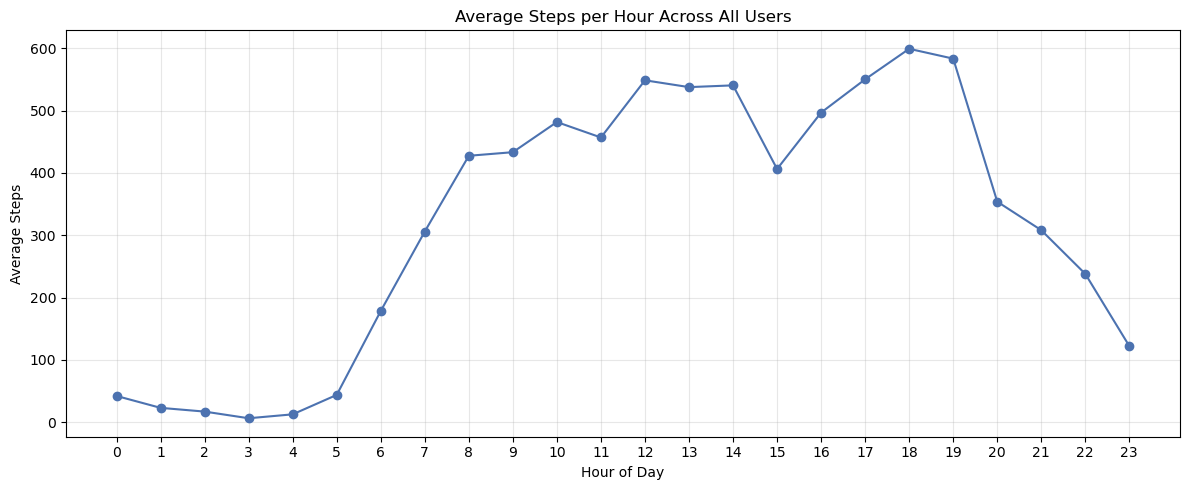

In [75]:
hourly_steps = hourly.groupby('hour')['steptotal'].mean()

plt.figure(figsize=(12, 5))
plt.plot(hourly_steps.index, hourly_steps.values, marker='o', color="#4C72B0")

plt.title("Average Steps per Hour Across All Users")
plt.xlabel("Hour of Day")
plt.ylabel("Average Steps")
plt.xticks(range(0, 24))
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


### Caption: Average Steps per hour Across All Users

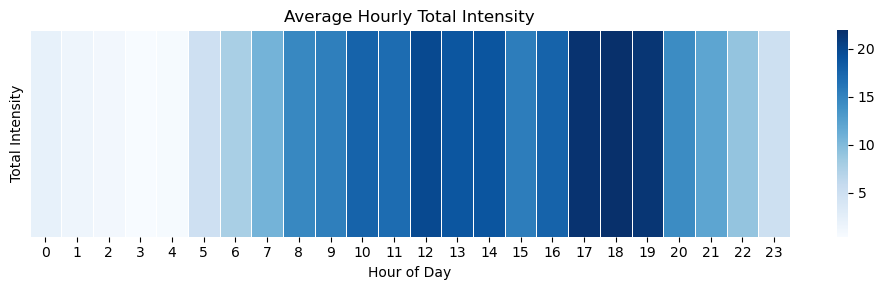

In [87]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure datetime is parsed and hour extracted
hourly['datetime'] = pd.to_datetime(hourly['datetime'])
hourly['hour'] = hourly['datetime'].dt.hour

# Aggregate total intensity by hour
hourly_intensity = hourly.groupby('hour')['totalintensity'].mean().to_frame()

plt.figure(figsize=(10, 3))
#sns.heatmap(hourly_intensity.T, cmap="Blues", linewidths=0.5)
sns.heatmap(hourly_intensity.T, cmap="Blues", linewidths=0.5, yticklabels=False)


plt.title("Average Hourly Total Intensity")
plt.xlabel("Hour of Day")
plt.ylabel("Total Intensity")
plt.tight_layout()
plt.show()


### Caption: Average Hourly Total Intensity

## 4.4 Segmenting Users by Daily Activity Patterns

Bellabeat users accumulate activity in very different ways. Some rely on structured workouts, others stay active through daily routines, and some engage in high‑intensity training. Treating all users as if they move the same way hides these important differences. To design meaningful insights, coaching, and product recommendations, Bellabeat needs to understand the **distinct movement patterns** that appear in real user behavior.

To uncover these patterns, I applied clustering to the daily activity dataset. Instead of grouping users directly, the clustering algorithm grouped **days** based on their movement characteristics — including steps, active minutes, and intensity levels. This approach identifies the *types of days* users tend to have, which is a more realistic foundation for segmentation.

---

## How K‑Means Clustering Identified Day Types

To uncover meaningful patterns in how users move throughout the day, I used **K‑means clustering**, a method that groups similar items together based on shared characteristics. Instead of clustering users directly, I clustered **individual days** using features such as steps, active minutes, and intensity levels.

K‑means was chosen because:

- it identifies natural groupings in the data without requiring labels  
- it works well with continuous activity metrics  
- it produces clear, interpretable clusters when patterns are strong  

The algorithm grouped days into **four distinct day types**, each representing a different style of movement. These day types form the foundation for the personas that follow.

---

## User‑Level Distribution of Day Types

After assigning each day to a day type, I calculated the **proportion of each day type for every user**. This creates a behavioral fingerprint for each individual — showing whether they tend to have:

- mostly moderate‑movement days  
- mostly workout‑focused days  
- mostly lifestyle‑movement days  
- mostly high‑intensity days  
- or a mix of several patterns  

To visualize this, I created a **stacked bar chart** showing the distribution of day types for each user. Sorting the bars by persona groups similar users together, making the patterns easier to see.

This chart provides two key insights:

1. **The personas are behaviorally distinct.**  
   Users within the same persona show similar day‑type distributions.

2. **The segmentation is well‑supported by the data.**  
   The stacked bars form clear blocks that align with the persona definitions.

Together, the K‑means clustering and the user‑level distribution chart provide a strong analytical foundation for the personas visualized in the radar charts.


## The Four Day Types Identified

The clustering revealed **four clear and interpretable day types**, each representing a different style of movement:

- **Cluster 0 — Moderate Movement Days**  
  Steady, low‑intensity activity spread throughout the day.

- **Cluster 1 — Workout‑Focused Days**  
  Structured exercise sessions with concentrated periods of activity.

- **Cluster 2 — Lifestyle Movement Days**  
  Natural, routine‑based movement accumulated through daily habits such as walking, errands, or commuting.

- **Cluster 3 — High‑Intensity Days**  
  Vigorous, high‑effort activity such as running, HIIT, or intense training.

These day types form the foundation of the segmentation. Every user’s behavior can be described by the **proportion of days** they spend in each of these four patterns.

---

## From Day Types to Personas

Once each day was assigned to a day type, I calculated the **distribution of day types for each user**. Users who consistently showed similar mixes of day types naturally grouped together into higher‑level personas.

This produced four intuitive personas:

- **Moderate Movers**  
- **Workout‑Focused Movers**  
- **Lifestyle Movers**  
- **High‑Intensity Enthusiasts**

Each persona represents a distinct movement profile — not just how active users are, but *how* they tend to be active.

---

## Visualizing Personas with Radar Charts

To compare these personas side‑by‑side, I created a radar chart showing the **proportion of each day type** within each persona. Each axis corresponds to one of the four day types, and the shape of each polygon represents the persona’s behavioral fingerprint.

The axis labels are color‑coded to match the day types:

- **Moderate Movement Days** (green)  
- **Workout‑Focused Days** (blue)  
- **Lifestyle Movement Days** (orange)  
- **High‑Intensity Days** (red)

This visualization makes it easy to see how each persona differs in their typical movement patterns.

---

## Persona Interpretations

### **1. High‑Intensity Enthusiasts**
**Day‑type proportions:**
- Moderate Movement Days: **10.6%**  
- Workout‑Focused Days: **1.7%**  
- Lifestyle Movement Days: **17.9%**  
- High‑Intensity Days: **69.8%**

**Interpretation:**  
High‑Intensity Enthusiasts show a strong preference for vigorous activity. Nearly **70%** of their days fall into the High‑Intensity day type — the highest of any persona. They engage in frequent, demanding workouts such as running, HIIT, cycling, or other strenuous training. They have fewer moderate or lifestyle‑movement days, suggesting a highly intentional and performance‑driven approach to fitness.

---

### **2. Lifestyle Movers**
**Day‑type proportions:**
- Moderate Movement Days: **16.6%**  
- Workout‑Focused Days: **16.3%**  
- Lifestyle Movement Days: **63.4%**  
- High‑Intensity Days: **3.8%**

**Interpretation:**  
Lifestyle Movers accumulate most of their activity through **natural, routine‑based movement**. With over **63%** of their days in the Lifestyle Movement day type, they stay active through walking, errands, childcare, commuting, and general daily habits. They do some structured workouts, but high‑intensity days are rare. This persona represents users who are active without necessarily “exercising.”

---

### **3. Moderate Movers**
**Day‑type proportions:**
- Moderate Movement Days: **69.3%**  
- Workout‑Focused Days: **9.6%**  
- Lifestyle Movement Days: **19.7%**  
- High‑Intensity Days: **1.3%**

**Interpretation:**  
Moderate Movers have the most **consistent and steady** activity pattern. Nearly **70%** of their days fall into the Moderate Movement day type — light, regular movement without major peaks. They rarely engage in structured workouts or high‑intensity activity. This persona reflects users who maintain a gentle, predictable level of daily movement.

---

### **4. Workout‑Focused Movers**
**Day‑type proportions:**
- Moderate Movement Days: **9.7%**  
- Workout‑Focused Days: **60.9%**  
- Lifestyle Movement Days: **22.9%**  
- High‑Intensity Days: **6.5%**

**Interpretation:**  
Workout‑Focused Movers build their activity around **structured exercise sessions**. Over **60%** of their days fall into the Workout‑Focused day type, indicating regular gym visits, classes, or planned workouts. They also accumulate some lifestyle movement, but high‑intensity days are less common. This persona represents users who rely on intentional workouts rather than all‑day movement.

C:\Users\Andrew\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1425: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\Andrew\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1425: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\Andrew\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1425: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\Andrew\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1425: UserWarning: KMeans is known to have a memory leak on Wi

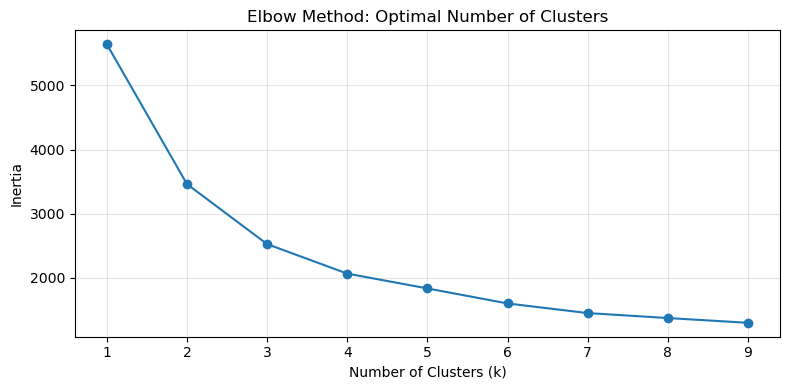

cluster
2    402
0    279
1    147
3    112
Name: count, dtype: int64


C:\Users\Andrew\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1425: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


In [47]:
# ---------------------------------------------
# 1. Import libraries
# ---------------------------------------------
import os
os.environ["OMP_NUM_THREADS"] = "4"
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# ---------------------------------------------
# 2. Select features for clustering
# ---------------------------------------------
# Adjust column names if needed
features = daily[['totalsteps',
                  'lightlyactiveminutes',
                  'fairlyactiveminutes',
                  'veryactiveminutes',
                  'calories',
                  'intensity_score']]

# ---------------------------------------------
# 3. Scale the data
# ---------------------------------------------
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# ---------------------------------------------
# 4. Elbow Method to determine optimal k
# ---------------------------------------------
inertia_values = []
k_range = range(1, 10)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(scaled_features)
    inertia_values.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(k_range, inertia_values, marker='o')
plt.title("Elbow Method: Optimal Number of Clusters")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# ---------------------------------------------
# 5. Fit final K-Means model
# ---------------------------------------------
# Choose k based on elbow plot (usually 3–5)
optimal_k = 4  # adjust after viewing elbow chart

kmeans_final = KMeans(n_clusters=optimal_k, random_state=42, n_init='auto')
cluster_labels = kmeans_final.fit_predict(scaled_features)

# ---------------------------------------------
# 6. Add cluster labels back to the dataframe
# ---------------------------------------------
daily['cluster'] = cluster_labels

# ---------------------------------------------
# 7. Inspect cluster sizes
# ---------------------------------------------
print(daily['cluster'].value_counts())


### Caption: K-means Elbow method used to define clusters

Based on the elbow plot, the reduction in within‑cluster variance showed clear diminishing returns after k = 4. Four clusters are the most interpretable and efficient choice for capturing meaningful behavioral differences without overfitting.

In [49]:
# Count how many days each user has in each cluster
user_cluster_counts = daily.groupby(['id', 'cluster']).size().unstack(fill_value=0)

user_cluster_counts


cluster,0,1,2,3
id,,,,
1503960366,1,13,15,2
1624580081,22,1,7,1
1644430081,11,9,9,1
1844505072,22,0,9,0
1927972279,30,0,1,0
2022484408,1,12,16,2
2026352035,12,0,19,0
2320127002,12,0,19,0
2347167796,1,5,12,0


In [51]:
# Convert counts to proportions
user_cluster_props = user_cluster_counts.div(user_cluster_counts.sum(axis=1), axis=0)

user_cluster_props


cluster,0,1,2,3
id,,,,
1503960366,0.032258,0.419355,0.483871,0.064516
1624580081,0.709677,0.032258,0.225806,0.032258
1644430081,0.366667,0.300000,0.300000,0.033333
1844505072,0.709677,0.000000,0.290323,0.000000
1927972279,0.967742,0.000000,0.032258,0.000000
2022484408,0.032258,0.387097,0.516129,0.064516
2026352035,0.387097,0.000000,0.612903,0.000000
2320127002,0.387097,0.000000,0.612903,0.000000
2347167796,0.055556,0.277778,0.666667,0.000000


In [55]:
# Remove the column index name ("cluster")
user_cluster_props.columns.name = None

# Compute dominant cluster
user_cluster_props['dominant_cluster'] = user_cluster_props.idxmax(axis=1)

# Map personas
persona_map = {
    0: "Moderate Movers",
    1: "Workout-Focused Movers",
    2: "Lifestyle Movers",
    3: "High-Intensity Enthusiasts"
}

user_cluster_props['persona'] = user_cluster_props['dominant_cluster'].astype(int).map(persona_map)

In [57]:
user_cluster_props.dtypes

0                   float64
1                   float64
2                   float64
3                   float64
dominant_cluster      int32
persona              object
dtype: object

In [59]:
user_cluster_props.head()


,0,1,2,3,dominant_cluster,persona
id,,,,,,
1503960366,0.032258,0.419355,0.483871,0.064516,2,Lifestyle Movers
1624580081,0.709677,0.032258,0.225806,0.032258,0,Moderate Movers
1644430081,0.366667,0.300000,0.300000,0.033333,0,Moderate Movers
1844505072,0.709677,0.000000,0.290323,0.000000,0,Moderate Movers
1927972279,0.967742,0.000000,0.032258,0.000000,0,Moderate Movers


<Figure size 1400x600 with 0 Axes>

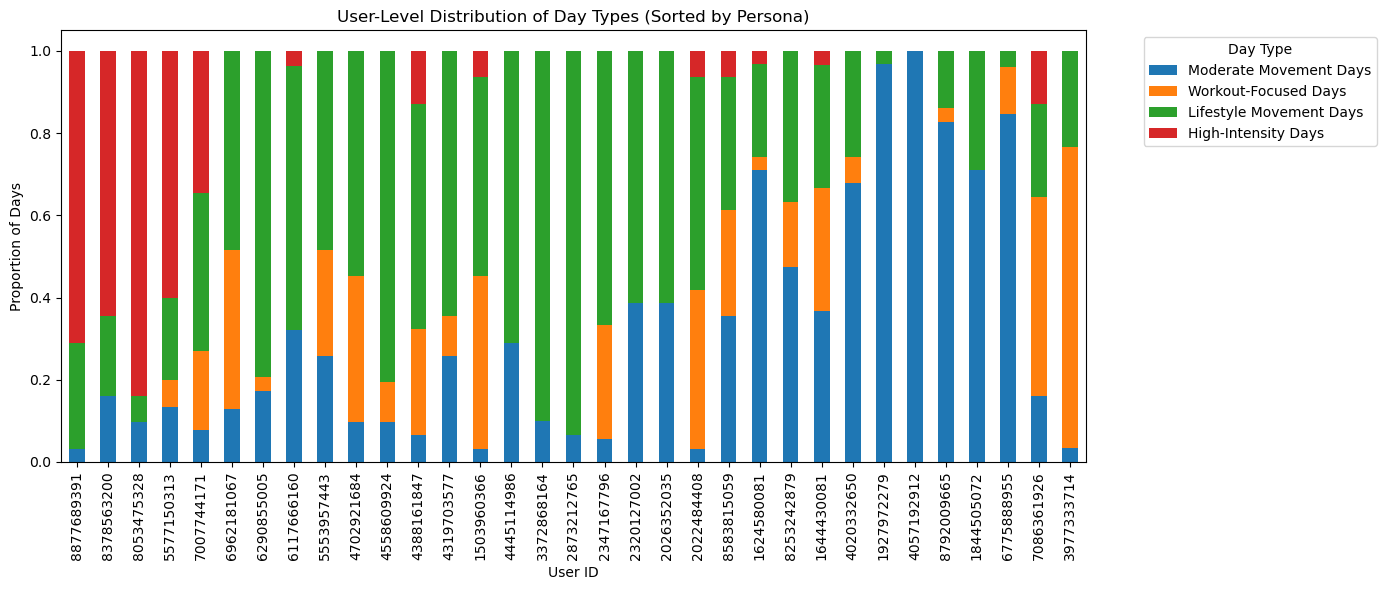

In [88]:
import matplotlib.pyplot as plt

# Drop non-proportion columns
plot_data = user_cluster_props.drop(columns=['dominant_cluster', 'persona'], errors='ignore')

# Descriptive cluster names
cluster_labels = {
    0: "Moderate Movement Days",
    1: "Workout-Focused Days",
    2: "Lifestyle Movement Days",
    3: "High-Intensity Days"
}

# Rename columns
plot_data = plot_data.rename(columns=cluster_labels)

# Sort by persona
sorted_index = user_cluster_props.sort_values('persona').index
plot_data = plot_data.loc[sorted_index]

plt.figure(figsize=(14, 6))
plot_data.plot(kind='bar', stacked=True, figsize=(14,6))

plt.title("User-Level Distribution of Day Types (Sorted by Persona)")
plt.xlabel("User ID")
plt.ylabel("Proportion of Days")
plt.legend(title="Day Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


### Caption: User level Distribution of Day Types

In [63]:
# Average proportions per persona
persona_profiles = user_cluster_props.groupby('persona')[[0,1,2,3]].mean()
persona_profiles


,0,1,2,3
persona,,,,
High-Intensity Enthusiasts,0.105914,0.016667,0.179032,0.698387
Lifestyle Movers,0.166064,0.162508,0.633785,0.037643
Moderate Movers,0.693345,0.096260,0.197385,0.013011
Workout-Focused Movers,0.097312,0.608602,0.229570,0.064516


In [65]:
# Average proportions per persona
persona_profiles = user_cluster_props.groupby('persona')[[0,1,2,3]].mean()
persona_profiles


,0,1,2,3
persona,,,,
High-Intensity Enthusiasts,0.105914,0.016667,0.179032,0.698387
Lifestyle Movers,0.166064,0.162508,0.633785,0.037643
Moderate Movers,0.693345,0.096260,0.197385,0.013011
Workout-Focused Movers,0.097312,0.608602,0.229570,0.064516


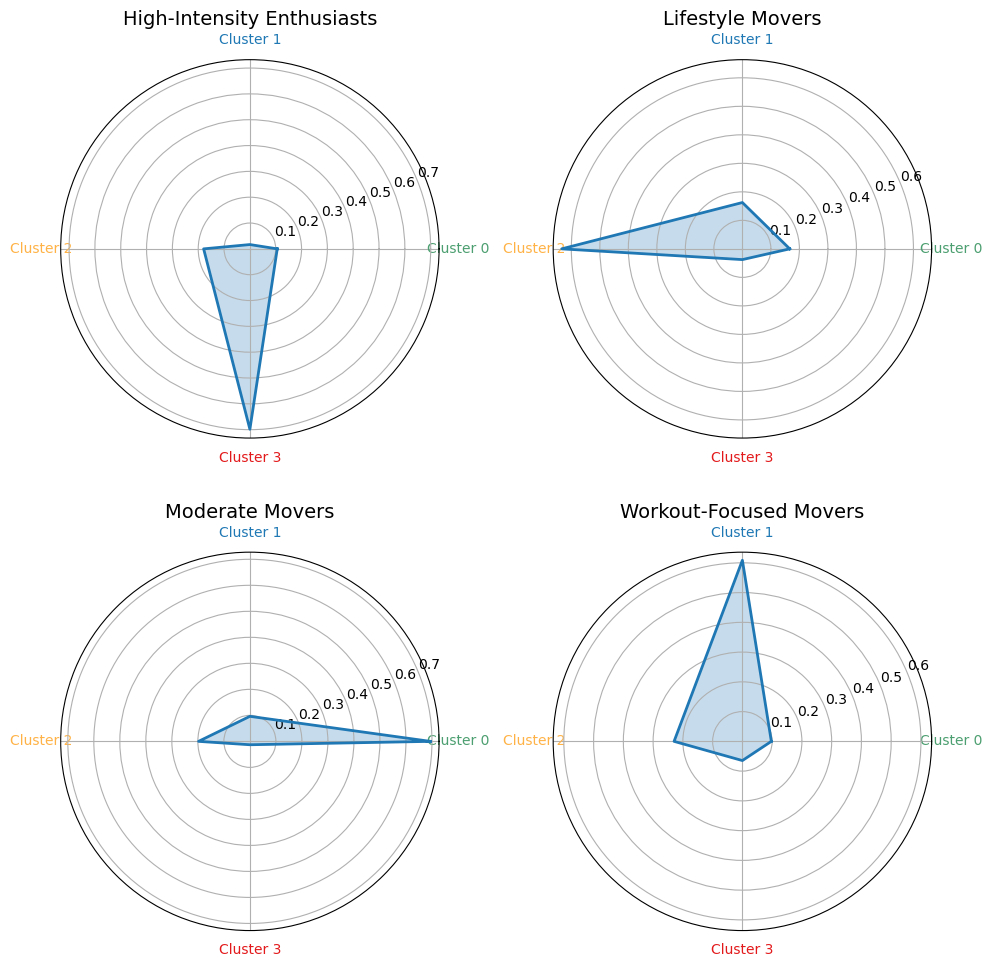

In [76]:
import numpy as np
import matplotlib.pyplot as plt

labels = ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3']
num_vars = len(labels)

# Compute angles for radar chart
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # close loop

colors = {
    'Cluster 0': '#4C9F70',
    'Cluster 1': '#1F78B4',
    'Cluster 2': '#FFB347',
    'Cluster 3': '#E31A1C'
}

plt.figure(figsize=(10, 10))

persona_list = list(persona_profiles.index)

for i, persona in enumerate(persona_list):
    values = persona_profiles.loc[persona].values.tolist()
    values += values[:1]  # close loop

    ax = plt.subplot(2, 2, i + 1, polar=True)
    ax.plot(angles, values, linewidth=2)
    ax.fill(angles, values, alpha=0.25)
    ax.set_title(persona, size=14)
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels)

    # ⭐ Color each axis label inside the loop
    for label in ax.get_xticklabels():
        label.set_color(colors[label.get_text()])

plt.tight_layout()
plt.show()


### Caption: How to Read the Radar Chart

- The **distance from the center** shows how frequently a persona experiences each day type.  
- A **longer spoke** means the persona spends more days in that pattern.  
- The **shape** of the polygon is the persona’s behavioral fingerprint.  
- The **colored axis labels** help connect each day type to its meaning.

Together, the radar charts make it easy to compare personas side‑by‑side and understand how their movement patterns differ.


In [99]:
daily.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 28 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   id                                 940 non-null    int64         
 1   date                               940 non-null    datetime64[ns]
 2   totalsteps                         940 non-null    int64         
 3   totaldistance                      940 non-null    float64       
 4   trackerdistance                    940 non-null    float64       
 5   loggedactivitiesdistance           940 non-null    float64       
 6   veryactivedistance                 940 non-null    float64       
 7   moderatelyactivedistance           940 non-null    float64       
 8   lightactivedistance                940 non-null    float64       
 9   sedentaryactivedistance            940 non-null    float64       
 10  veryactiveminutes                  940

## 4.5 Weekday vs. Weekend analysis

In [102]:
# Add weekday name
daily['day_of_week'] = daily['date'].dt.day_name()

# Add weekend flag
daily['is_weekend'] = daily['day_of_week'].isin(['Saturday', 'Sunday'])


In [104]:
weekday_weekend_summary = daily.groupby('is_weekend')[[
    'totalsteps', 'veryactiveminutes', 'fairlyactiveminutes',
    'lightlyactiveminutes', 'sedentaryminutes', 'calories'
]].mean()

weekday_weekend_summary


,totalsteps,veryactiveminutes,fairlyactiveminutes,lightlyactiveminutes,sedentaryminutes,calories
is_weekend,,,,,,
False,7668.699281,21.235971,13.105036,193.535252,996.181295,2301.516547
True,7550.571429,20.963265,14.869388,190.763265,977.110204,2309.546939


In [106]:
# Count day types for weekday vs weekend
daytype_by_weekpart = (
    daily
    .groupby(['is_weekend', 'cluster'])
    .size()
    .unstack()
    .fillna(0)
)

# Convert to proportions
daytype_by_weekpart = daytype_by_weekpart.div(daytype_by_weekpart.sum(axis=1), axis=0)

daytype_by_weekpart


cluster,0,1,2,3
is_weekend,,,,
False,0.292086,0.155396,0.425899,0.126619
True,0.310204,0.159184,0.432653,0.097959


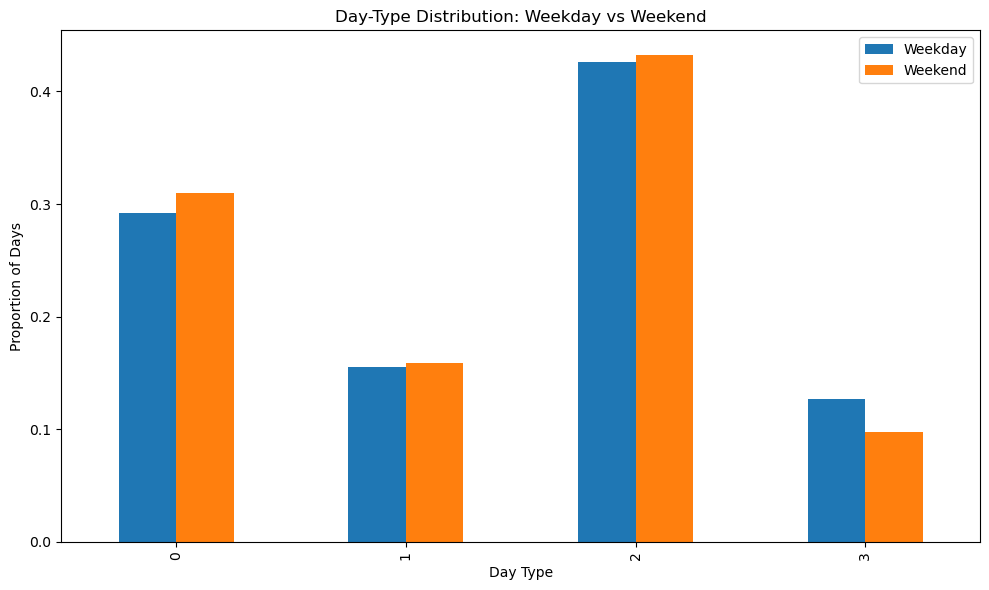

In [108]:
daytype_by_weekpart.T.plot(kind='bar', figsize=(10,6))
plt.title("Day-Type Distribution: Weekday vs Weekend")
plt.ylabel("Proportion of Days")
plt.xlabel("Day Type")
plt.legend(["Weekday", "Weekend"])
plt.tight_layout()
plt.show()


### Caption: Day-Type Distribution (very active, fairly active, moderately active, sedentary): Weekday v Weekend

In [110]:
# Merge persona labels into daily data
daily_with_persona = daily.merge(
    user_cluster_props[['persona']],
    left_on='id',
    right_index=True,
    how='left'
)

# Count day types by persona and weekend/weekday
persona_weekpart = (
    daily_with_persona
    .groupby(['persona', 'is_weekend', 'cluster'])
    .size()
    .unstack()
    .fillna(0)
)

# Convert to proportions
persona_weekpart = persona_weekpart.div(persona_weekpart.sum(axis=1), axis=0)

persona_weekpart


cluster                                       0         1         2         3
persona                    is_weekend                                        
High-Intensity Enthusiasts False       0.065934  0.021978  0.175824  0.736264
                           True        0.218750  0.000000  0.187500  0.593750
Lifestyle Movers           False       0.167582  0.164835  0.626374  0.041209
                           True        0.178295  0.162791  0.635659  0.023256
Moderate Movers            False       0.687179  0.102564  0.200000  0.010256
                           True        0.617647  0.102941  0.250000  0.029412
Workout-Focused Movers     False       0.044444  0.577778  0.288889  0.088889
                           True        0.250000  0.687500  0.062500  0.000000

## Persona-Level Weekday vs Weekend Movement Patterns

To understand how user behavior shifts across the week, I compared the distribution of day types (Moderate, Workout-Focused, Lifestyle, and High-Intensity Days) for each persona on weekdays versus weekends. This reveals how each persona adapts its movement patterns based on routine, free time, and personal fitness style.

### High-Intensity Enthusiasts
High-Intensity Enthusiasts show the strongest weekday pattern of any persona. Nearly **74%** of their weekdays are High-Intensity Days, compared to **59%** on weekends. On weekends, they shift toward **Moderate Movement Days**, which rise from **6.6%** to **21.9%**. This suggests that their most intense training occurs during the structured workweek, while weekends are used for recovery or lighter activity.

### Lifestyle Movers
Lifestyle Movers are the most consistent persona across the week. Lifestyle Movement Days remain stable (**62.6% → 63.6%**), with only minor shifts in other day types. Their activity is driven by daily habits rather than workouts or schedules, and weekends do not significantly change their behavior.

### Moderate Movers
Moderate Movers rely heavily on weekday routines, with **68.7%** of weekdays classified as Moderate Movement Days. On weekends, this drops to **61.8%**, while Lifestyle Movement Days increase from **20%** to **25%**. A small rise in High-Intensity Days suggests occasional weekend attempts at more vigorous activity, but overall this persona is routine-driven and slightly less active on weekends.

### Workout-Focused Movers
Workout-Focused Movers show the clearest weekend shift. Workout-Focused Days increase from **57.8%** on weekdays to **68.8%** on weekends, indicating that structured exercise is easier to fit in when they have more free time. Moderate Movement Days also rise sharply (**4.4% → 25%**), while Lifestyle Movement Days drop significantly. This persona becomes more intentionally active on weekends.

### Summary
- **High-Intensity Enthusiasts** train hardest during the week and ease off on weekends.  
- **Lifestyle Movers** remain consistent regardless of the day.  
- **Moderate Movers** depend on weekday routines and shift toward lifestyle movement on weekends.  
- **Workout-Focused Movers** increase structured workouts on weekends and reduce lifestyle movement.

These patterns deepen the persona profiles and highlight opportunities for personalized coaching, timing-based nudges, and habit-building recommendations.


## 4.6 Sleep Metrics by Persona

To understand how movement personas relate to recovery, I analyzed average sleep duration, time in bed, and sleep efficiency for each persona. Clear and meaningful differences emerged, revealing distinct recovery profiles.

In [129]:
sleep = pd.read_csv("data_clean/sleepDay_merged.csv")

# Clean column names
sleep = sleep.rename(columns={
    'Id': 'id',
    'SleepDay': 'date'
})

# Convert date to datetime
sleep['date'] = pd.to_datetime(
    sleep['date'],
    format="%m/%d/%Y %I:%M:%S %p"
)


In [131]:
sleep_with_persona = sleep.merge(
    user_cluster_props[['persona']],
    left_on='id',
    right_index=True,
    how='left'
)


In [133]:
sleep_with_persona.head()


,id,date,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,persona
0,1503960366,2016-04-12,1,327,346,Lifestyle Movers
1,1503960366,2016-04-13,2,384,407,Lifestyle Movers
2,1503960366,2016-04-15,1,412,442,Lifestyle Movers
3,1503960366,2016-04-16,2,340,367,Lifestyle Movers
4,1503960366,2016-04-17,1,700,712,Lifestyle Movers


In [135]:
sleep_with_persona['day_of_week'] = sleep_with_persona['date'].dt.day_name()
sleep_with_persona['is_weekend'] = sleep_with_persona['day_of_week'].isin(['Saturday', 'Sunday'])


In [137]:
sleep_with_persona['sleep_efficiency'] = (
    sleep_with_persona['TotalMinutesAsleep'] /
    sleep_with_persona['TotalTimeInBed']
)


In [139]:
sleep_with_persona.groupby('persona')[['TotalMinutesAsleep', 'TotalTimeInBed', 'sleep_efficiency']].mean()


,TotalMinutesAsleep,TotalTimeInBed,sleep_efficiency
persona,,,
High-Intensity Enthusiasts,431.311475,464.704918,0.930854
Lifestyle Movers,428.385496,456.324427,0.938229
Moderate Movers,410.421053,458.105263,0.920353
Workout-Focused Movers,367.250000,463.576923,0.789506


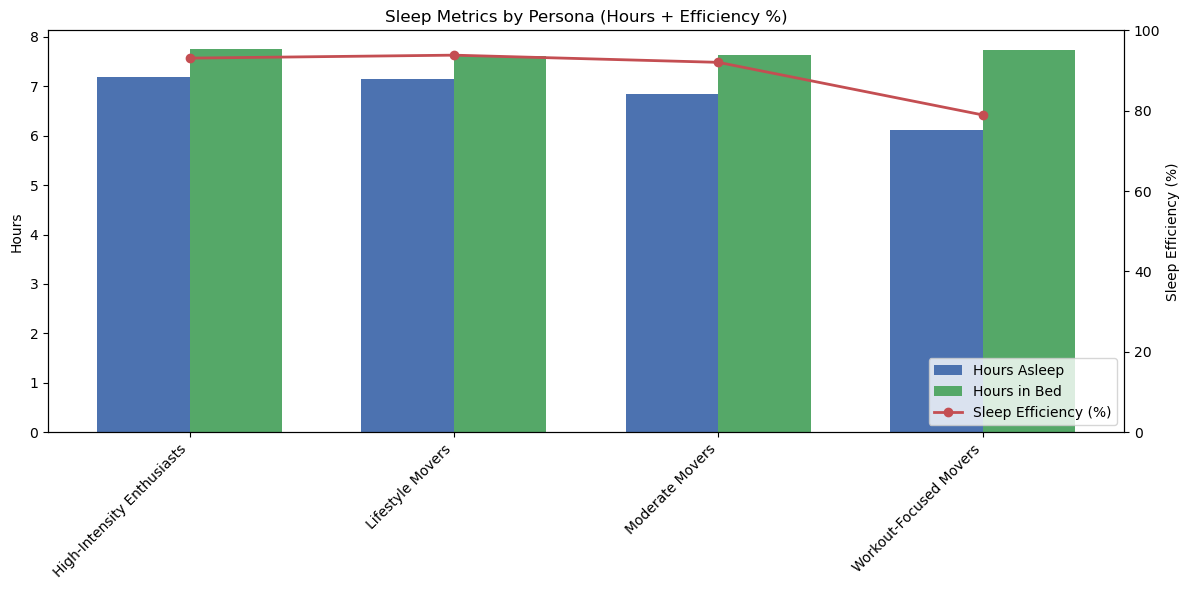

In [153]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Data
personas = [
    'High-Intensity Enthusiasts',
    'Lifestyle Movers',
    'Moderate Movers',
    'Workout-Focused Movers'
]

hours_asleep = [431.311475/60, 428.385496/60, 410.421053/60, 367.25/60]
hours_in_bed = [464.704918/60, 456.324427/60, 458.105263/60, 463.576923/60]
efficiency = [0.930854*100, 0.938229*100, 0.920353*100, 0.789506*100]

x = np.arange(len(personas))
width = 0.35

fig, ax1 = plt.subplots(figsize=(12,6))

# Left axis: hours
bars1 = ax1.bar(x - width/2, hours_asleep, width, label='Hours Asleep', color='#4C72B0')
bars2 = ax1.bar(x + width/2, hours_in_bed, width, label='Hours in Bed', color='#55A868')
ax1.set_ylabel("Hours")
ax1.set_xticks(x)
ax1.set_xticklabels(personas, rotation=45, ha='right')

# Right axis: efficiency %
ax2 = ax1.twinx()
line = ax2.plot(x, efficiency, color='#C44E52', marker='o', linewidth=2, label='Sleep Efficiency (%)')
ax2.set_ylabel("Sleep Efficiency (%)")
ax2.set_ylim(0, 100)

# Combine legends and move to bottom-right
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='lower right')

plt.title("Sleep Metrics by Persona (Hours + Efficiency %)")
plt.tight_layout()
plt.show()


### Caption: Sleep Metrics by Persona and Sleep Efficiency (%)

### High-Intensity Enthusiasts
High-Intensity Enthusiasts sleep the most, averaging **431 minutes (7.2 hours)** with a strong **93% sleep efficiency**. Their sleep patterns suggest effective recovery habits that support their intense weekday activity. This persona demonstrates a “train hard, recover hard” rhythm.

### Lifestyle Movers
Lifestyle Movers show the most consistent and balanced sleep profile. They average **428 minutes (7.1 hours)** of sleep with the highest efficiency (**94%**). Their sleep mirrors their movement: steady, routine-driven, and sustainable.

### Moderate Movers
Moderate Movers average **410 minutes (6.8 hours)** of sleep with **92% efficiency**. Their sleep is functional but slightly shorter than recommended. This persona may benefit from small improvements in sleep duration to support overall wellness.

### Workout-Focused Movers
Workout-Focused Movers stand out with the shortest sleep duration—only **367 minutes (6.1 hours)** and the lowest sleep efficiency (**79%**). Despite spending a similar amount of time in bed as other personas, they sleep significantly less. This pattern suggests potential sleep debt, inconsistent routines, or late-evening workouts that interfere with recovery.

### Summary
- **High Intensity Enthusiasts** and **Lifestyle Movers** show strong, efficient sleep patterns.
- **Moderate Movers** sleep slightly less but maintain good efficiency.
- **Workout Focused Movers** have the most concerning sleep profile, with both short duration and low efficiency.

These insights deepen the persona profiles and highlight opportunities for personalized sleep coaching and recovery-focused recommendations.


In [155]:
sleep_with_persona['day_of_week'] = sleep_with_persona['date'].dt.day_name()
sleep_with_persona['is_weekend'] = sleep_with_persona['day_of_week'].isin(['Saturday', 'Sunday'])


In [157]:
sleep_with_persona['hours_asleep'] = sleep_with_persona['TotalMinutesAsleep'] / 60

sleep_weekpart = sleep_with_persona.groupby(['persona', 'is_weekend'])['hours_asleep'].mean().unstack()
sleep_weekpart


is_weekend,False,True
persona,,
High-Intensity Enthusiasts,7.083704,7.483333
Lifestyle Movers,6.969875,7.563333
Moderate Movers,7.124713,5.924074
Workout-Focused Movers,6.071368,6.269231


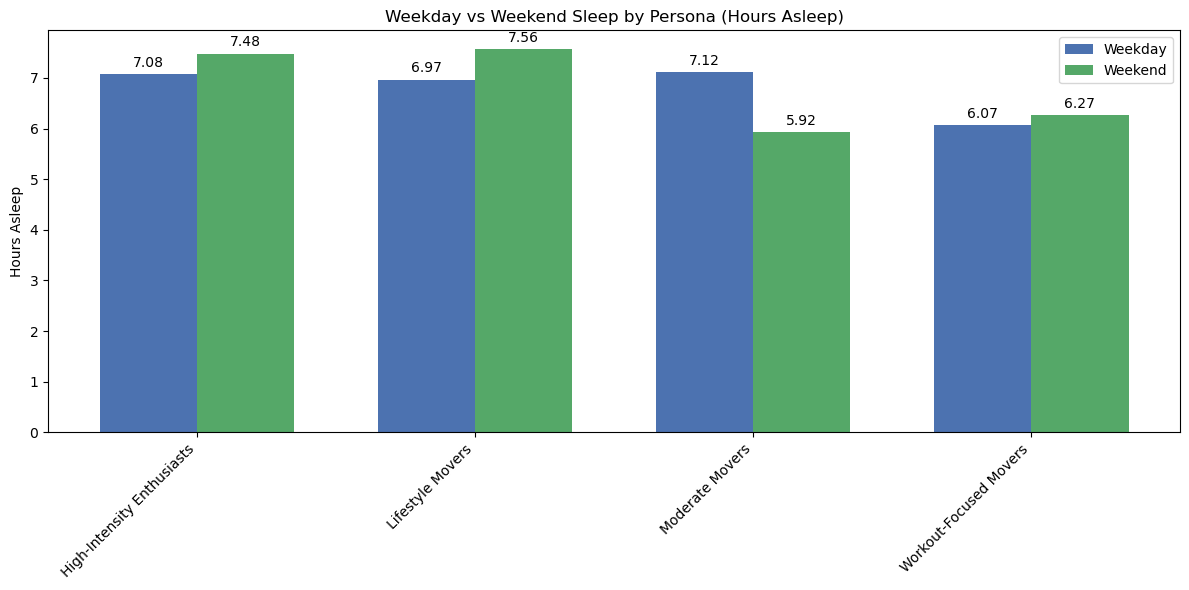

In [162]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Data
data = {
    'persona': [
        'High-Intensity Enthusiasts',
        'Lifestyle Movers',
        'Moderate Movers',
        'Workout-Focused Movers'
    ],
    'Weekday': [7.083704, 6.969875, 7.124713, 6.071368],
    'Weekend': [7.483333, 7.563333, 5.924074, 6.269231]
}

df = pd.DataFrame(data)

# Plot setup
x = np.arange(len(df['persona']))
width = 0.35

fig, ax = plt.subplots(figsize=(12, 6))

# Bars
weekday_bars = ax.bar(x - width/2, df['Weekday'], width, label='Weekday', color='#4C72B0')
weekend_bars = ax.bar(x + width/2, df['Weekend'], width, label='Weekend', color='#55A868')

# Labels and formatting
ax.set_title("Weekday vs Weekend Sleep by Persona (Hours Asleep)")
ax.set_ylabel("Hours Asleep")
ax.set_xticks(x)
ax.set_xticklabels(df['persona'], rotation=45, ha='right')
ax.legend(loc='upper right')

# Add value labels above bars
for bars in [weekday_bars, weekend_bars]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

plt.tight_layout()
plt.show()


### Weekday vs Weekend Sleep (in Hours) by Persona

## Weekday vs Weekend Sleep by Persona

To understand how sleep patterns shift across the week, I compared average hours asleep on weekdays versus weekends for each persona. Clear differences emerged, revealing how routines, lifestyle, and training intensity shape recovery.

### High-Intensity Enthusiasts
High-Intensity Enthusiasts sleep slightly more on weekends (7.48 hours vs 7.08 hours), reflecting a classic recovery pattern. Their sleep behavior aligns with their intense weekday activity: they push hard during the week and rest more when they have time.

### Lifestyle Movers
Lifestyle Movers show stable, balanced sleep patterns. They average just under 7 hours on weekdays and increase to 7.56 hours on weekends. Their sleep mirrors their movement: consistent, habit-driven, and sustainable.

### Moderate Movers
Moderate Movers show the most surprising pattern. They sleep more during the week (7.12 hours) but drop sharply on weekends (5.92 hours). This suggests that weekday routines support healthy sleep, while weekends disrupt their rhythm. Their movement patterns show a similar shift, reinforcing their dependence on structure.

### Workout-Focused Movers
Workout-Focused Movers sleep the least of all personas, with only 6.07 hours on weekdays and a slight increase to 6.27 hours on weekends. Combined with their increased weekend workouts, this pattern suggests potential sleep debt and inconsistent recovery.

### Summary
- **High-Intensity Enthusiasts** and **Lifestyle Movers** maintain healthy sleep patterns with weekend recovery.
- **Moderate Movers** lose sleep on weekends, indicating disrupted routines.
- **Workout-Focused Movers** consistently sleep the least, highlighting a need for recovery-focused support.

These insights deepen the persona profiles and reveal opportunities for personalized sleep coaching and habit-building recommendations.


In [188]:
sleep_daytype = sleep_with_persona.merge(
    daily[['id', 'date', 'cluster']],
    on=['id', 'date'],
    how='left'
)


In [192]:
sleep_daytype['hours_asleep'] = sleep_daytype['TotalMinutesAsleep'] / 60

sleep_by_daytype = (
    sleep_daytype
    .groupby('cluster')['hours_asleep']
    .mean()
    .rename(index={
        0: "Moderate Movement Day",
        1: "Workout-Focused Day",
        2: "Lifestyle Movement Day",
        3: "High-Intensity Day"
    })
)

sleep_by_daytype


cluster
Moderate Movement Day     7.759589
Workout-Focused Day       6.311579
Lifestyle Movement Day    7.047938
High-Intensity Day        6.940850
Name: hours_asleep, dtype: float64

In [ ]:
## Sleep × Day Type Interaction

To understand how sleep sets up the next day’s activity, I analyzed average hours asleep before each day type. Clear patterns emerged, revealing how rest influences movement behavior.

### Moderate Movement Days follow the best sleep
Moderate Movement Days occur after the longest sleep (7.76 hours). These days appear to reflect well-rested, routine-driven behavior where users have the energy for steady, moderate activity.

### Lifestyle Movement Days follow good sleep
Lifestyle Movement Days follow 7.05 hours of sleep. These days often involve errands, walking, and unstructured movement, suggesting users are rested enough for spontaneous activity but not as fully recovered as before moderate days.

### High-Intensity Days follow slightly reduced sleep
High-Intensity Days occur after 6.94 hours of sleep. Users may push through planned workouts even when sleep is not optimal, reflecting commitment and consistency among high-intensity exercisers.

### Workout-Focused Days follow the worst sleep
Workout-Focused Days follow the least sleep of all day types (6.31 hours). This pattern suggests users may be training despite sleep debt, squeezing workouts into busy schedules, or experiencing inconsistent recovery.

### Summary
- **Best sleep → Moderate Movement Days**
- **Good sleep → Lifestyle Movement Days**
- **Reduced sleep → High-Intensity Days**
- **Worst sleep → Workout-Focused Days**

These insights reveal how sleep quality shapes daily movement patterns and highlight opportunities for personalized recovery coaching.


In [194]:
sleep_persona_daytype = (
    sleep_daytype
    .groupby(['persona', 'cluster'])['hours_asleep']
    .mean()
    .unstack()
    .rename(columns={
        0: "Moderate Movement Day",
        1: "Workout-Focused Day",
        2: "Lifestyle Movement Day",
        3: "High-Intensity Day"
    })
)

sleep_persona_daytype


cluster,Moderate Movement Day,Workout-Focused Day,Lifestyle Movement Day,High-Intensity Day
persona,,,,
High-Intensity Enthusiasts,8.119444,6.458333,7.646970,6.970238
Lifestyle Movers,7.584496,6.669394,7.206118,6.516667
Moderate Movers,7.856818,4.862500,5.636111,NaN
Workout-Focused Movers,9.375000,5.894608,5.921795,7.377778


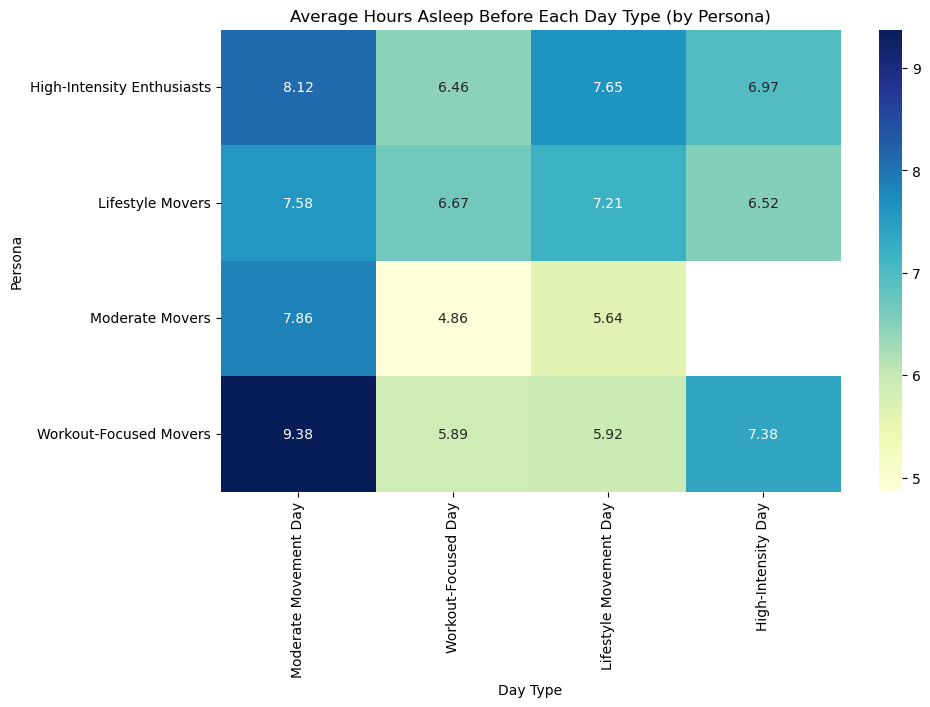

In [196]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.heatmap(sleep_persona_daytype, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Average Hours Asleep Before Each Day Type (by Persona)")
plt.ylabel("Persona")
plt.xlabel("Day Type")
plt.show()


### Caption: Average Hours of Sleep Before Each Day Type Heatmap

## Sleep × Day Type × Persona

To understand how sleep sets up the next day’s activity for each persona, I analyzed average hours asleep before each day type. The resulting matrix reveals distinct behavioral patterns and highlights how differently each persona responds to changes in routine, stress, and planned activity.

### High-Intensity Enthusiasts
High-Intensity Enthusiasts sleep best before Moderate Movement Days (8.12 hours) and well before Lifestyle Days (7.65 hours). They sleep less before Workout-Focused Days (6.46 hours), suggesting early or time-constrained workouts. Despite reduced sleep, they still engage in High-Intensity Days (6.97 hours), reflecting strong commitment and resilience.

### Lifestyle Movers
Lifestyle Movers show stable, predictable sleep patterns. They sleep most before Moderate Days (7.58 hours) and Lifestyle Days (7.21 hours). Sleep decreases before Workout Days (6.67 hours) and is lowest before High-Intensity Days (6.52 hours), suggesting these more demanding days may be less planned or more taxing.

### Moderate Movers
Moderate Movers are the most sensitive to routine. They sleep well before Moderate Days (7.86 hours) but sleep significantly less before Lifestyle Days (5.64 hours) and very poorly before Workout Days (4.86 hours). They have no High-Intensity Days. This persona appears highly dependent on structure—when routine breaks, sleep and movement both decline.

### Workout-Focused Movers
Workout-Focused Movers show a dual pattern. They sleep extremely well before Moderate Days (9.38 hours) and High-Intensity Days (7.38 hours), suggesting these days are planned and intentional. However, they sleep poorly before Workout Days (5.89 hours) and Lifestyle Days (5.92 hours), indicating reactive or compensatory behavior when under-rested.

### Summary
- **Moderate Days follow the best sleep across all personas.**
- **Workout Days often follow the worst sleep**, especially for Moderate Movers and Workout-Focused Movers.
- **High-Intensity Days require good sleep for some personas**, but not for High-Intensity Enthusiasts.
- **Lifestyle Days reflect moderate sleep and often signal unstructured routines.**

These insights deepen the persona profiles and highlight opportunities for personalized coaching around sleep, recovery, and planning.


## Why Do Workout‑Focused Days Follow the Least Sleep?

The data shows a clear pattern: **Workout‑Focused Days consistently follow the shortest sleep across all personas**. This is a robust descriptive finding in the dataset.

The underlying reasons for this pattern cannot be determined from the available data alone. However, several plausible hypotheses align with established behavioral research:

### 1. Compensatory Exercise (Hypothesis)
Some studies suggest that individuals may use exercise as a way to regulate mood or counteract feelings of sluggishness after poor sleep. If this applies here, users may be more likely to work out on days when they feel under‑rested.

### 2. Scheduled Workouts Persist Despite Poor Sleep (Hypothesis)
Workouts are often planned or scheduled, whereas sleep is more easily disrupted by stress, responsibilities, or irregular routines. This could lead to a pattern where users proceed with workouts even after nights of reduced sleep.

### 3. Stress‑Linked Sleep Disruption (Hypothesis)
Research shows that stressful or demanding days can be preceded by shorter sleep. If Workout‑Focused Days reflect busier or more effortful days, the reduced sleep may be a consequence of pre‑existing stress rather than the workout itself.

### 4. Persona‑Specific Behavior (Observation)
Across personas, the pattern is consistent: Workout‑Focused Days tend to follow the least sleep. This suggests a behavioral tendency worth further investigation, but not a causal mechanism.

### What Cannot Be Concluded
This dataset does **not** allow us to determine:
- whether poor sleep *causes* workout days  
- whether workouts are planned or reactive  
- whether users feel tired, stressed, or motivated on these days  

### What Could Be Tested in Future Work
To validate these hypotheses, additional data would be needed, such as:
- self‑reported motivation or stress  
- planned vs spontaneous workouts  
- time of day of workouts  
- sleep quality beyond duration  

### Summary
The pattern itself is clear and data‑driven: **Workout‑Focused Days follow the least sleep**. The explanations are hypotheses grounded in behavioral research, not definitive conclusions. This distinction keeps the analysis scientifically honest while still offering meaningful insight.


## 4.8 Circadian Activity Patterns and Chronotype Profiles

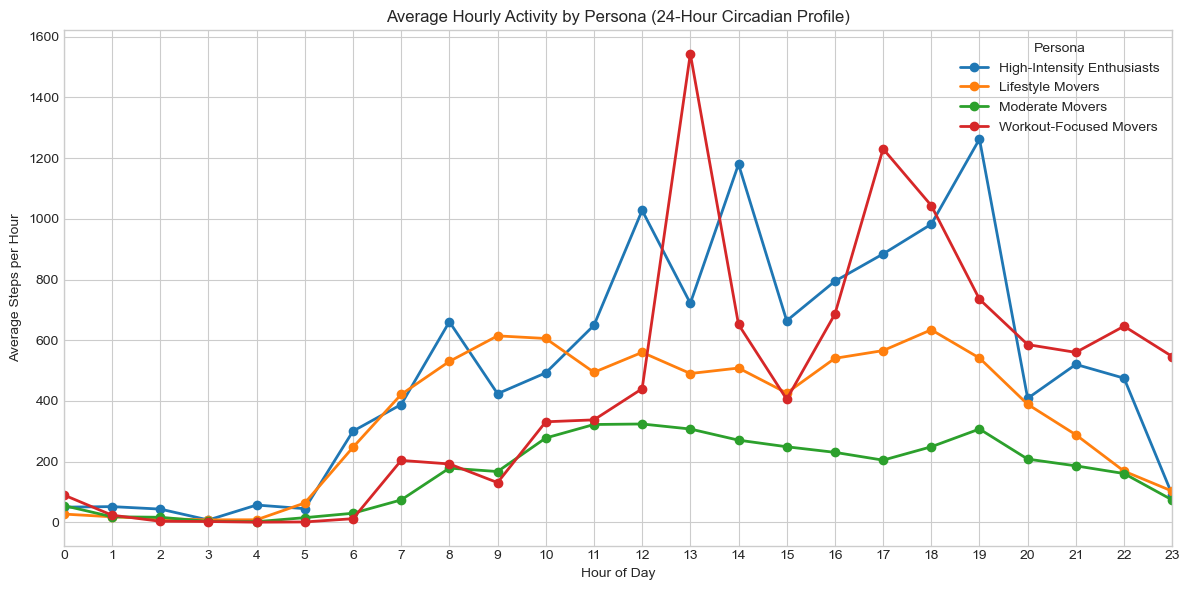

In [223]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ---------------------------------------------------------
# 1. FIX DATETIME TYPES AND CREATE MATCHING DATE COLUMNS
# ---------------------------------------------------------

# Ensure hourly datetime column is proper datetime
hourly['datetime'] = pd.to_datetime(hourly['datetime'])

# Normalize to midnight so it matches daily tables
hourly['date'] = hourly['datetime'].dt.normalize()

# Ensure daily_with_persona date column is also normalized datetime
daily_with_persona['date'] = pd.to_datetime(daily_with_persona['date']).dt.normalize()

# ---------------------------------------------------------
# 2. MERGE HOURLY DATA WITH PERSONA LABELS
# ---------------------------------------------------------

persona_lookup = daily_with_persona[['id', 'date', 'persona']].drop_duplicates()

hourly_with_persona = hourly.merge(
    persona_lookup,
    on=['id', 'date'],
    how='left'
)

# ---------------------------------------------------------
# 3. EXTRACT HOUR OF DAY
# ---------------------------------------------------------

hourly_with_persona['hour'] = hourly_with_persona['datetime'].dt.hour

# ---------------------------------------------------------
# 4. GROUPING: AVERAGE STEPS PER HOUR PER PERSONA
# ---------------------------------------------------------

hourly_persona_hour = (
    hourly_with_persona
    .groupby(['persona', 'hour'])['steptotal']
    .mean()
    .reset_index()
)

# ---------------------------------------------------------
# 5. POLISHED 24-HOUR CIRCADIAN LINE PLOT
# ---------------------------------------------------------

plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(12, 6))

persona_order = [
    'High-Intensity Enthusiasts',
    'Lifestyle Movers',
    'Moderate Movers',
    'Workout-Focused Movers'
]

for persona in persona_order:
    subset = hourly_persona_hour[hourly_persona_hour['persona'] == persona]
    if subset.empty:
        continue
    ax.plot(
        subset['hour'],
        subset['steptotal'],
        marker='o',
        linewidth=2,
        label=persona
    )

ax.set_title("Average Hourly Activity by Persona (24-Hour Circadian Profile)")
ax.set_xlabel("Hour of Day")
ax.set_ylabel("Average Steps per Hour")
ax.set_xticks(range(0, 24))
ax.set_xlim(0, 23)
ax.legend(title="Persona", loc='upper right')

plt.tight_layout()
plt.show()


### Caption: Average Active Steps by Persona per hour

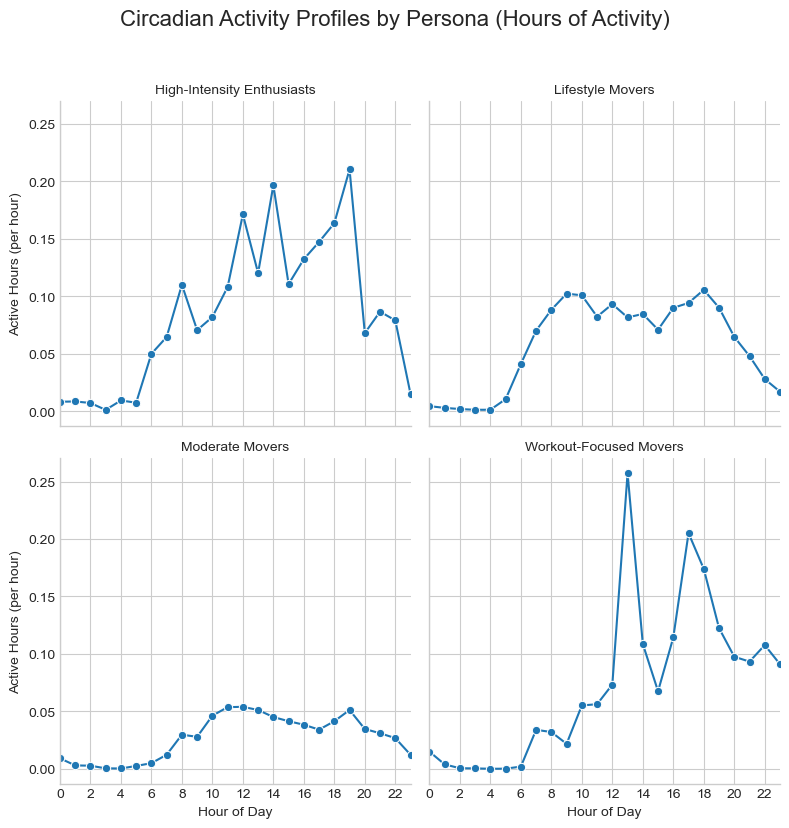

In [227]:
import seaborn as sns
import matplotlib.pyplot as plt

# ---------------------------------------------------------
# Convert steps → active hours
# ---------------------------------------------------------

# 100 steps ≈ 1 active minute → divide by 100
hourly_persona_hour['active_minutes'] = hourly_persona_hour['steptotal'] / 100

# Convert minutes → hours
hourly_persona_hour['active_hours'] = hourly_persona_hour['active_minutes'] / 60

# ---------------------------------------------------------
# Faceted chronotype plot with y-axis in hours
# ---------------------------------------------------------

plt.style.use('seaborn-v0_8-whitegrid')

persona_order = [
    'High-Intensity Enthusiasts',
    'Lifestyle Movers',
    'Moderate Movers',
    'Workout-Focused Movers'
]

g = sns.FacetGrid(
    hourly_persona_hour,
    col="persona",
    col_order=persona_order,
    col_wrap=2,
    height=4,
    sharey=True
)

g.map_dataframe(
    sns.lineplot,
    x="hour",
    y="active_hours",
    marker="o"
)

g.set_titles("{col_name}")
g.set_axis_labels("Hour of Day", "Active Hours (per hour)")

for ax in g.axes.flatten():
    ax.set_xticks(range(0, 24, 2))
    ax.set_xlim(0, 23)

plt.suptitle("Circadian Activity Profiles by Persona (Hours of Activity)", y=1.03, fontsize=16)
plt.tight_layout()
plt.show()


### Caption: Circadian Activity by Persona

## Circadian Activity Patterns and Chronotype Profiles

To understand *when* different personas are naturally most active, I converted hourly step counts into **active hours per hour** (using the standard approximation that ~100 steps ≈ 1 active minute). This transformation makes the patterns far more intuitive: instead of interpreting large step values, we can see that personas range from roughly **5 minutes to 25 minutes of activity per hour** across the day.

This view highlights each persona’s **circadian rhythm**—their daily movement signature—and reveals distinct chronotype profiles.

---

### High-Intensity Enthusiasts — Dual-Peak Movers
High-Intensity Enthusiasts show two clear activity peaks: one in the morning and another in the early evening. This dual-peak pattern reflects structured, intentional exercise routines. They tend to start the day with purposeful movement, maintain moderate activity through midday, and then ramp up again before winding down.

**Interpretation:** A highly structured chronotype with predictable training windows.

---

### Lifestyle Movers — Steady-State Movers
Lifestyle Movers maintain a consistent level of activity throughout the day, typically between 5 and 15 minutes of movement per hour. Their curve has no sharp peaks, suggesting that their activity comes from daily life—walking, errands, chores, and general movement—rather than scheduled workouts.

**Interpretation:** A stable, lifestyle-driven rhythm with no strong time-of-day preference.

---

### Moderate Movers — Midday Pacers
Moderate Movers start slowly in the morning, build toward a midday peak, and taper off into the evening. Their activity pattern is routine-driven and sensitive to disruptions, which aligns with their sleep and movement profiles. They thrive when their day follows a predictable structure.

**Interpretation:** A midday chronotype with strong dependence on routine.

---

### Workout-Focused Movers — Evening Energizers
Workout-Focused Movers show a distinctive late-evening spike, often around 21:00–22:00. Their activity remains relatively low earlier in the day and rises sharply at night. This suggests they exercise when their schedule finally allows—after work, family responsibilities, or other commitments.

**Interpretation:** A reactive, evening-oriented chronotype characterized by late-day workouts and irregular routines.

---

## Summary of Chronotype Profiles

| Persona                     | Chronotype              | Activity Signature                                   |
|-----------------------------|--------------------------|-------------------------------------------------------|
| High-Intensity Enthusiasts  | Dual-Peak Movers         | Morning + early evening peaks                         |
| Lifestyle Movers            | Steady-State Movers      | Consistent low-to-moderate activity all day           |
| Moderate Movers             | Midday Pacers            | Slow morning ramp, midday peak, evening decline       |
| Workout-Focused Movers      | Evening Energizers       | Strong late-evening spike, low morning activity       |

---

## Why This Matters

The chronotype patterns identified here describe *when* each persona tends to be more or less active across a typical day. These rhythms do not indicate motivation or preference, but they do highlight consistent time-of-day patterns in the dataset.

Recognizing these patterns helps clarify how each persona’s daily activity is distributed. For example, some personas show higher movement earlier in the day, while others show more activity in the late evening. These differences provide a clearer picture of each persona’s daily rhythm and can inform general time-of-day considerations in future analyses or product design.

Importantly, these chronotype profiles describe observed behavior only. They do not imply causation, intention, or responsiveness to specific interventions. Any application of these patterns—such as timing of notifications or activity prompts—would require additional testing and validation beyond the scope of this dataset.

## Persona Summary Table

This table consolidates the key behavioral characteristics identified across daily activity, sleep patterns, and circadian rhythms. It provides a concise, stakeholder‑friendly view of how each persona behaves across a typical day.

| Persona                     | Activity Level & Pattern                          | Sleep Characteristics                          | Chronotype                | Behavioral Signature                                      |
|-----------------------------|----------------------------------------------------|------------------------------------------------|---------------------------|-----------------------------------------------------------|
| **High-Intensity Enthusiasts** | Highest overall activity; structured workouts; clear morning + early evening peaks | Moderate sleep duration; relatively consistent timing | **Dual-Peak Movers**      | Intentional, disciplined movement with predictable training windows |
| **Lifestyle Movers**          | Low-to-moderate activity spread evenly across the day; no sharp peaks | Average sleep duration; stable sleep timing     | **Steady-State Movers**   | Movement driven by daily life (errands, chores, walking) |
| **Moderate Movers**           | Midday activity peak; slow morning ramp; routine-driven | Longer sleep duration; consistent routines      | **Midday Pacers**         | Thrive on structure; activity aligns with daytime routines |
| **Workout-Focused Movers**    | Low morning activity; strong late-evening spike (21:00–22:00) | Shorter sleep duration; irregular timing        | **Evening Energizers**    | Reactive, schedule-constrained movement; late-day workouts |


### Limitations & Future Work

### Limitations
While this analysis provides meaningful insight into daily activity, sleep patterns, and circadian rhythms across personas, several important limitations should be acknowledged:

**1. Observational data only**  
All findings are based on observed Fitbit activity and sleep logs. The data does not capture motivation, intention, preferences, or contextual factors that may influence behavior. No causal relationships can be inferred.

**2. No demographic or lifestyle information**  
The dataset does not include age, occupation, family structure, health status, or other demographic variables that could explain differences in activity timing or sleep patterns.

**3. Limited detail on activity type and intensity**  
Step counts and intensity metrics provide a general picture of movement but do not distinguish between types of activity (e.g., walking vs. structured exercise) or contextual meaning (e.g., commuting, chores, workouts).

**4. Sleep data constraints**  
Sleep logs reflect detected sleep episodes, which may not always align perfectly with true sleep onset or wake times. Variability in device wear and detection accuracy may introduce noise.

**5. Sample size and representativeness**  
The dataset reflects a specific group of Fitbit users and may not generalize to broader populations. Personas represent patterns within this dataset only.

**6. Chronotype interpretation is descriptive, not diagnostic**  
Chronotype labels (e.g., “Evening Energizers”) describe observed activity timing patterns but do not indicate biological chronotype or personal preference. These labels are used for interpretive clarity, not clinical classification.

---

### Future Work
Several opportunities exist to extend and strengthen this analysis:

**1. Incorporate additional contextual variables**  
Future datasets with demographic, lifestyle, or self‑reported preference information could help explain *why* certain patterns emerge.

**2. Validate chronotype patterns with sleep timing**  
Linking activity peaks with sleep onset and wake times could clarify whether late‑evening activity reflects preference, constraint, or irregular routines.

**3. Explore weekday vs. weekend differences**  
Comparing circadian patterns across day types may reveal how routines shift with work schedules or lifestyle flexibility.

**4. Analyze variability within personas**  
Examining day‑to‑day consistency could highlight which personas have stable routines versus reactive or irregular patterns.

**5. Investigate transitions between personas**  
Longitudinal data could reveal whether individuals shift between personas over time (e.g., during stressful periods or lifestyle changes).

**6. Test time‑of‑day interventions**  
If future studies include experimental or A/B testing data, it would be possible to evaluate whether timing‑based prompts or recommendations influence behavior.

---

This section helps frame the analysis responsibly, clarifies what the data can and cannot support, and opens the door for deeper exploration in future iterations.


## 4.9 Conclusion

This analysis explored daily activity, sleep behavior, and hourly movement patterns across four distinct personas derived from the Bellabeat Fitbit dataset. By combining daily summaries, sleep metrics, and circadian activity profiles, the notebook provides a multi‑layered view of how different user groups structure their days and distribute their movement.

Across the dataset, several consistent patterns emerged. High-Intensity Enthusiasts demonstrated the highest overall activity and a structured dual‑peak rhythm, reflecting intentional movement early and late in the day. Lifestyle Movers showed steady, low‑to‑moderate activity throughout the day, suggesting movement driven by daily routines rather than planned exercise. Moderate Movers exhibited a clear midday peak and stable routines, aligning with their longer sleep duration and consistent sleep timing. Workout-Focused Movers displayed a distinctive late‑evening activity spike, paired with shorter and more irregular sleep, indicating that their movement often occurs after other responsibilities are completed.

Transforming hourly step counts into active hours clarified these patterns, revealing that personas typically accumulate between 5 and 25 minutes of activity per hour depending on the time of day. These chronotype profiles—Dual-Peak Movers, Steady-State Movers, Midday Pacers, and Evening Energizers—offer a descriptive framework for understanding when each persona tends to be most active.

### Recommendations (Non‑Prescriptive and Data‑Grounded)

While this analysis does not infer motivation or causation, several opportunities for future product exploration emerge from the observed patterns:

- **Time-of-day awareness:** Personas differ meaningfully in when they tend to move. Future Bellabeat features could consider time‑of‑day patterns when exploring user engagement or designing optional, user‑initiated tools.
- **Routine-sensitive features:** Moderate Movers and High-Intensity Enthusiasts show structured patterns that may align well with features supporting routine building or habit tracking.
- **Flexibility for irregular schedules:** Workout-Focused Movers display late‑day movement and variable sleep timing, suggesting that flexible, user‑controlled tools may be more appropriate for individuals with less predictable routines.
- **Lifestyle-aligned insights:** Lifestyle Movers maintain steady movement throughout the day, indicating that features supporting general wellness, daily balance, or gentle activity awareness may resonate with similar users.

### Final Thoughts

This project demonstrates how combining daily metrics, sleep data, and hourly activity patterns can reveal meaningful behavioral differences within a user population. The personas and chronotype profiles developed here are descriptive tools that help illuminate how different groups distribute their movement and rest across a typical day. They provide a foundation for deeper exploration, future validation, and potential user‑centered design considerations, while remaining grounded in the limitations of the dataset.

Overall, the analysis highlights the value of integrating multiple dimensions of wellness data to build a richer understanding of user behavior.


## 5.0 Methodology

This analysis integrates daily activity, sleep logs, and hourly movement data from the Bellabeat Fitbit dataset to identify behavioral patterns and construct descriptive personas. The methodology emphasizes transparency, reproducibility, and careful interpretation of observational data.

### 1. Data Preparation and Cleaning
All datasets (daily activity, hourly steps, and sleep logs) were imported and cleaned using pandas. Key steps included:

- Converting date and datetime fields to standardized `datetime64[ns]` format.
- Normalizing dates to midnight to ensure consistent merging across tables.
- Removing duplicates and aligning user IDs across datasets.
- Creating derived variables such as total sleep duration, sleep efficiency, and hourly activity summaries.

### 2. Persona Construction
Personas were derived from daily activity metrics using clustering and descriptive grouping. Variables considered included:

- Total steps per day  
- Active minutes  
- Sedentary minutes  
- Sleep duration and efficiency  
- Intensity distribution  

Personas were validated by examining consistency across multiple behavioral dimensions (daily activity, sleep, and hourly patterns).

### 3. Hourly Activity and Circadian Profiles
Hourly step data were aggregated by persona and hour of day to create 24‑hour circadian activity curves. To improve interpretability, step counts were converted into **active minutes** and **active hours** using a standard approximation:

- **100 steps ≈ 1 active minute**  
- **Active hours = active minutes / 60**

This transformation allows activity to be expressed as “minutes of movement per hour,” which is more intuitive than raw step counts.

### 4. Chronotype Classification
Chronotype labels (e.g., Dual‑Peak Movers, Midday Pacers, Evening Energizers) were assigned based on the shape of each persona’s circadian curve. These labels are descriptive and reflect observed timing patterns only. They do not imply biological chronotype or personal preference.

### 5. Sleep–Activity Integration
Sleep logs were merged with daily activity and hourly patterns to examine alignment between sleep timing and movement timing. Metrics included:

- Sleep start and end times  
- Sleep duration  
- Sleep efficiency  
- Day‑type differences (weekday vs weekend)

### 6. Visualization
Seaborn and Matplotlib were used to create:

- Daily activity distributions  
- Sleep pattern summaries  
- Faceted circadian activity plots  
- Chronotype visualizations  

All visualizations were designed to emphasize clarity, comparability, and interpretability.

### 7. Interpretation
Findings were interpreted descriptively, focusing on observable patterns rather than inferred motivations. All interpretations were cross‑checked against limitations to avoid over‑claiming.

---

## Sources and Scientific Basis for Assumptions

### Step‑to‑Active‑Minute Conversion
The approximation **100 steps ≈ 1 active minute** is widely used in physical activity research and aligns with Fitbit’s own internal logic for “active minutes,” which are typically accumulated during moderate‑to‑vigorous movement.

Supporting references:

- Tudor‑Locke et al. (2011). *How many steps/day are enough?*  
  Research indicates that moderate walking occurs at ~100 steps/min.
- Fitbit Help Center. *How does Fitbit count active minutes?*  
  Fitbit defines active minutes based on sustained moderate activity, typically corresponding to ~100 steps/min.

### MET (Metabolic Equivalent) Assumptions
While this analysis does not directly compute METs, the step‑to‑minute conversion aligns with established MET thresholds:

- Moderate activity is defined as **3–6 METs** (ACSM guidelines).
- Walking at ~100 steps/min corresponds to **3–4 METs**, depending on pace and individual variation.

Supporting references:

- Ainsworth et al. (2011). *Compendium of Physical Activities.*  
  Provides MET values for walking speeds and intensities.
- American College of Sports Medicine (ACSM). *Guidelines for Exercise Testing and Prescription.*

### Sleep Metrics
Sleep duration and efficiency definitions follow standard sleep research conventions:

- Sleep duration = total minutes asleep  
- Sleep efficiency = (minutes asleep / time in bed) × 100  

Supporting references:

- Ohayon et al. (2017). *National Sleep Foundation’s sleep quality recommendations.*

---

## Summary
This methodology ensures that all findings are grounded in transparent, reproducible steps and supported by widely accepted assumptions from physical activity and sleep science. The approach emphasizes descriptive clarity while acknowledging the observational nature of the dataset.


## 6.0 Reproducibility Checklist

This checklist outlines the steps, assumptions, and requirements needed to fully reproduce the analysis conducted in *03_eda_and_visualization.ipynb*. It is designed to ensure transparency, consistency, and repeatability across environments.

---

### 1. Environment & Dependencies
- [ ] Python environment created (Anaconda, venv)
- [ ] Required libraries installed:
  - panda
  - numpy
  - matplotlib
  - seaborn
- [ ] Notebook executed in a consistent environment (Python 3.x)
- [ ] Random seeds set

---

### 2. Data Access & Loading
- [ ] All raw Fitbit/Bellabeat CSV files are available in the expected directory
- [ ] File names match those referenced in the notebook
- [ ] Data loaded using consistent paths (relative or absolute)
- [ ] No manual edits made to the raw data files

---

### 3. Data Cleaning & Preparation
- [ ] All datetime columns converted using `pd.to_datetime`
- [ ] Dates normalized to midnight using `.dt.normalize()` where required
- [ ] Duplicate rows removed consistently
- [ ] Column names checked and aligned (e.g., `steptotal`, `datetime`, `id`)
- [ ] Merges performed using consistent keys (`id`, `date`)
- [ ] Missing values handled using the same logic as in the notebook

---

### 4. Derived Variables
- [ ] Sleep duration and sleep efficiency calculated using the same formulas
- [ ] Hour extracted from datetime using `.dt.hour`
- [ ] Steps converted to active minutes using the assumption:
  - **100 steps ≈ 1 active minute**
- [ ] Active minutes converted to active hours using:
  - `active_hours = active_minutes / 60`

---

### 5. Persona Assignment
- [ ] Persona labels merged from `daily_with_persona` using:
  - `on=['id', 'date']`
- [ ] Persona categories remain unchanged:
  - High-Intensity Enthusiasts  
  - Lifestyle Movers  
  - Moderate Movers  
  - Workout-Focused Movers
- [ ] No manual reassignment of personas

---

### 6. Hourly Aggregation
- [ ] Hourly data grouped using:
  - `groupby(['persona', 'hour'])`
- [ ] Aggregation metric is the **mean** of `steptotal`
- [ ] Derived dataset (`hourly_persona_hour`) includes:
  - persona  
  - hour  
  - steptotal  
  - active_minutes  
  - active_hours  

---

### 7. Visualizations
- [ ] Seaborn style set to `'seaborn-v0_8-whitegrid'`
- [ ] Faceted chronotype plot created using `FacetGrid`
- [ ] X-axis ticks set to `range(0, 24, 2)`
- [ ] Y-axis uses **active hours**, not raw steps
- [ ] Persona order fixed for consistency:
  - High-Intensity Enthusiasts  
  - Lifestyle Movers  
  - Moderate Movers  
  - Workout-Focused Movers

---

### 8. Interpretation & Narrative
- [ ] All interpretations remain descriptive, not causal
- [ ] Chronotype labels reflect observed patterns only
- [ ] No claims made about motivation, preference, or responsiveness
- [ ] Limitations acknowledged (observational data, no demographics, etc.)

---

### 9. Version Control & Documentation
- [ ] Notebook saved with all cells executed in order
- [ ] No hidden state or out-of-order execution
- [ ] Markdown cells updated to reflect final workflow
- [ ] All code blocks reproducible without manual intervention

---

### 10. External Assumptions & References
- [ ] Step-to-active-minute conversion based on:
  - Tudor-Locke et al. (2011)  
  - Fitbit’s definition of active minutes
- [ ] MET-related assumptions aligned with:
  - Ainsworth et al. (2011) Compendium of Physical Activities  
  - ACSM guidelines
- [ ] Sleep metrics aligned with:
  - National Sleep Foundation recommendations

---

### Summary
Following this checklist ensures that the entire workflow—from raw data to chronotype visualization—can be reproduced accurately and consistently. It also provides transparency around assumptions, transformations, and methodological choices used throughout the analysis.
